## Pasos del proyecto
Usaremos este notebook para reunir los pasos ordenados que hemos seguido en nuestro proyecto, primero lo del aprendizaje supervisado de clasificacion y mas tarde el no supervisado.
1. Consigue los datos

Los datos se han obtenido de dos datasets de kaggle, siendo el primero sobre la calidad del agua, con 7999 registros y 21 columnas, que es el que usaremos para el aprendizaje supervisado, y el otro de la potabilidad del agua, con 3276 filas y 10 columnas, que usaremos además del de calidad en el aprendizaje no supervisado
- https://www.kaggle.com/datasets/mssmartypants/water-quality
- https://www.kaggle.com/datasets/adityakadiwal/water-potability



In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [285]:
calidad = pd.read_csv('data/WaterQuality1.csv')
calidad


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


### Y SUS COLUMNAS
Los umbrales máximos comunes, basados en estándares internacionales y regulaciones de algunos países:

- Aluminium (Aluminio): El límite máximo permitido puede variar, pero típicamente está en el rango de 2 - 3 mg/L.
- Ammonia (Amoníaco): El límite máximo permitido suele estar alrededor de 20-30 mg/L.
- Arsenic (Arsénico): El límite máximo permitido puede ser tan bajo como 0.01 mg/L.
- Barium (Bario): El límite máximo permitido puede ser aproximadamente 1 - 2.0 mg/L.
- Cadmium (Cadmio): El límite máximo permitido puede ser tan bajo como 0.003 - 0.005 mg/L.
- Chloramine (Cloramina): El límite máximo permitido puede variar, pero suele estar en el rango de 3 - 4 mg/L.
- Chromium (Cromo): El límite máximo permitido para el cromo hexavalente suele ser alrededor de 0.05 - 0.1 mg/L.
- Copper (Cobre): El límite máximo permitido suele ser alrededor de 1.0 - 1.3 mg/L.
- Flouride (Fluoruro): El límite máximo permitido para la fluoración del agua suele ser alrededor de 1.0 - 1.5 mg/L.
- Bacteria y Viruses (Bacterias y Virus): El agua potable debe estar libre de bacterias y virus patógenos.
- Lead (Plomo): El límite máximo permitido suele ser muy bajo, alrededor de 0.01 - 0.015 mg/L.
- Nitrates (Nitratos): El límite máximo permitido suele ser alrededor de 10 mg/L.
- Nitrites (Nitritos): El límite máximo permitido suele ser alrededor de 1 mg/L.
- Mercury (Mercurio): El límite máximo permitido suele ser muy bajo, alrededor de 0.001 - 0.002 mg/L.
- Perchlorate (Perclorato): El límite máximo permitido puede variar, pero típicamente está en el rango de 6 - 56 µg/L.
- Radium (Radio): El límite máximo permitido suele ser alrededor de 5 - 10 pCi/L.
- Selenium (Selenio): El límite máximo permitido suele ser alrededor de 0.1 - 0.5 mg/L.
- Silver (Plata): El límite máximo permitido puede variar, pero suele estar en el rango de 0.05 - 0.1 mg/L.
- Uranium (Uranio): El límite máximo permitido suele ser alrededor de 0.2 - 0.3 mg/L.


In [286]:
agua_potable = pd.read_csv('data/water_potability.csv')
agua_potable

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Y LAS COLUMNAS DE ESTE DATASET REPRESENTAN
- pH: El pH es una medida de la acidez o alcalinidad del agua. Se refiere a la concentración de iones de hidrógeno en el agua. El pH se mide en una escala de 0 a 14, donde 7 es neutro. Valores por debajo de 7 indican acidez, y valores por encima de 7 indican alcalinidad.

- Hardness (Dureza): La dureza del agua se refiere a la concentración de minerales disueltos, especialmente calcio y magnesio. Una alta dureza del agua puede causar problemas como la formación de depósitos de cal en tuberías y electrodomésticos.

- Solids (Sólidos): Esta columna indica la concentración total de sólidos disueltos en el agua, medida en miligramos por litro (mg/L) o partes por millón (ppm). Los sólidos disueltos pueden incluir minerales, sales, metales y otros compuestos disueltos en el agua.

- Chloramines (Cloraminas): Las cloraminas son compuestos químicos formados por la reacción del cloro con amoníaco o compuestos de nitrógeno. Se utilizan comúnmente como desinfectantes en el tratamiento del agua potable para eliminar bacterias y otros microorganismos.

- Sulfate (Sulfato): El sulfato es un anión común en el agua que puede provenir de fuentes naturales como minerales disueltos o contaminantes antropogénicos. Altas concentraciones de sulfato en el agua pueden tener efectos adversos en la salud y en la calidad del agua.

- Conductivity (Conductividad): La conductividad del agua es una medida de su capacidad para conducir corriente eléctrica. Se relaciona con la cantidad de iones disueltos en el agua. Una alta conductividad puede indicar la presencia de sales disueltas u otros contaminantes.

- Organic_carbon (Carbono Orgánico): El carbono orgánico disuelto en el agua proviene de materiales orgánicos en descomposición. Puede afectar la calidad del agua y la eficacia de los procesos de tratamiento del agua potable.

- Trihalomethanes (Trihalometanos): Los trihalometanos son subproductos de la desinfección del agua con cloro. Se forman cuando el cloro reacciona con materia orgánica presente en el agua. Algunos trihalometanos pueden ser carcinogénicos y representar riesgos para la salud.

- Turbidity (Turbidez): La turbidez del agua se refiere a la claridad óptica o transparencia del agua. Es una medida de la cantidad de partículas suspendidas en el agua. La alta turbidez puede afectar la estética del agua y dificultar el tratamiento del agua potable.

- Potability(potabilidad): si el agua es considerada apta para el consumo humano

2. Define tu problema de Machine Learning: clasificación/regresión, supervisado/ no supervisado, series temporales, imágenes, texto...

El objetivo de este estudio era evaluar la calidad del agua en funcion de los contaminantes presentes en la misma, mediante el dataset de calidad.
En un primer momento, determinaremos si el agua es segura o no con un target ya incluido. Aplicaremos técnicas de análisis de datos y aprendizaje automático de clasificacion binaria, tales como Random Forest, XGBoost, incluso regresion lineal y estudiaremos la distribucion del target, creando modelos tambien resampleados para establecer una comparativa. 
Sin embargo, durante el desarrollo del proyecto hemos decidido que, dado que solo conociendo las concentraciones de ciertos contaminantes segun la legislacion ya podríamos determinar si el agua es segura o no para el consumo (si sobrepasan el umbral), llevar a cabo técnicas de aprendizaje no supervisado nos aportaría mucha más información útil para la exploración de posibles patrones ocultos entre features, descubrir nueva información, crear relaciones entre componentes que en un principio no se aprecian, detectar otras anomalías o incluso VER SEGMENTACIONES EN LAS MUESTRAS DE AGUA FORMADAS EN LOS CLUSTER. Nos hemos servido también del otro dataset, de potabilidad, puesto que tiene otras caracteristicas muy interesantes tales como el pH, la turbidez, la dureza... que no tenemos en el inicial y que pueden complementarse con los contaminantes ya estudiados.

3. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.

In [287]:
# Primeras exploraciones, columnas, nulos...
calidad.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [288]:
calidad.info()
# el target y la columna ammonia es objeto, habría que cambiarlo a numerico.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [289]:
calidad.isnull().sum() # parece que en principio no hay nulos

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [290]:
# COMO PRACTICAMENTE TODAS LAS COLUMNAS SON NUMERICAS, VEREMOS UN RESUMEN DE ESTADISTICAS
calidad.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [291]:
# Vamos a visualizar el porcentaje del target, si el agua es segura o no (RECORDEMOS, 0 ES AGUA NO SEGURA, 1 SEGURA)
calidad['is_safe'].value_counts(normalize=True) # Para ver la division
# ¡¡el target esta totalmente desbalanceado HACIA EL CERO, QUE ES QUE EL AGUA ES NO SEGURA!!, 
# y hay datos mal etiquetados, #NUM!

0        0.885611
1        0.114014
#NUM!    0.000375
Name: is_safe, dtype: float64

In [292]:
# primero, eliminamos los #NUM!
calidad['is_safe'] = pd.to_numeric(calidad['is_safe'], errors='coerce') # LOS CAMBIAMOS A NAN PARA ELIMINARLOS
calidad1 = calidad.dropna(subset=['is_safe'])

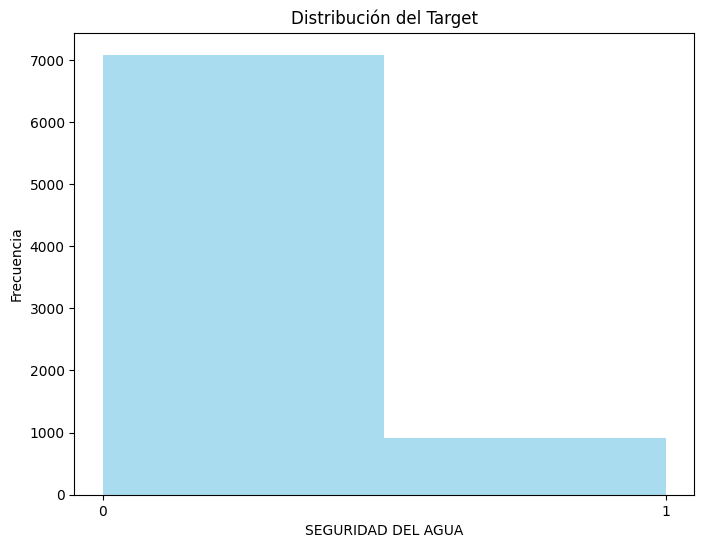

In [293]:
# representamos con un histograma para ver la distribucion
plt.figure(figsize=(8, 6))
plt.hist(calidad1['is_safe'], bins=2, color='skyblue', alpha=0.7)
plt.xlabel('SEGURIDAD DEL AGUA')
plt.ylabel('Frecuencia')
plt.title('Distribución del Target')
plt.xticks([0, 1])
plt.show()

In [294]:
# Y LA CORRELACION ENTRE COLUMNAS, POR SI PUDIESEMOS ELIMINAR ALGUNAS DE LAS QUE ESTEN MUY CORRELACIONADAS
correlacion = calidad.corr(numeric_only=True)
correlacion

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,-0.070863,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.333974
arsenic,0.225773,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,0.011703,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123362
barium,0.294145,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,-0.002276,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090858
cadmium,-0.099911,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,0.021183,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256034
chloramine,0.369309,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,0.003687,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186704
chromium,0.353218,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,0.002430,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182306
copper,0.168612,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,0.006292,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029498
flouride,-0.009784,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,0.018418,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006550
bacteria,-0.078238,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,0.618480,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022077
viruses,-0.070863,0.011703,-0.002276,0.021183,0.003687,0.002430,0.006292,0.018418,0.618480,1.000000,0.017598,-0.044544,-0.091517,0.011416,0.003208,-0.020112,-0.035047,0.011861,0.058434,-0.097040


C:\Users\Picar\AppData\Local\Temp\ipykernel_6716\3322753506.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



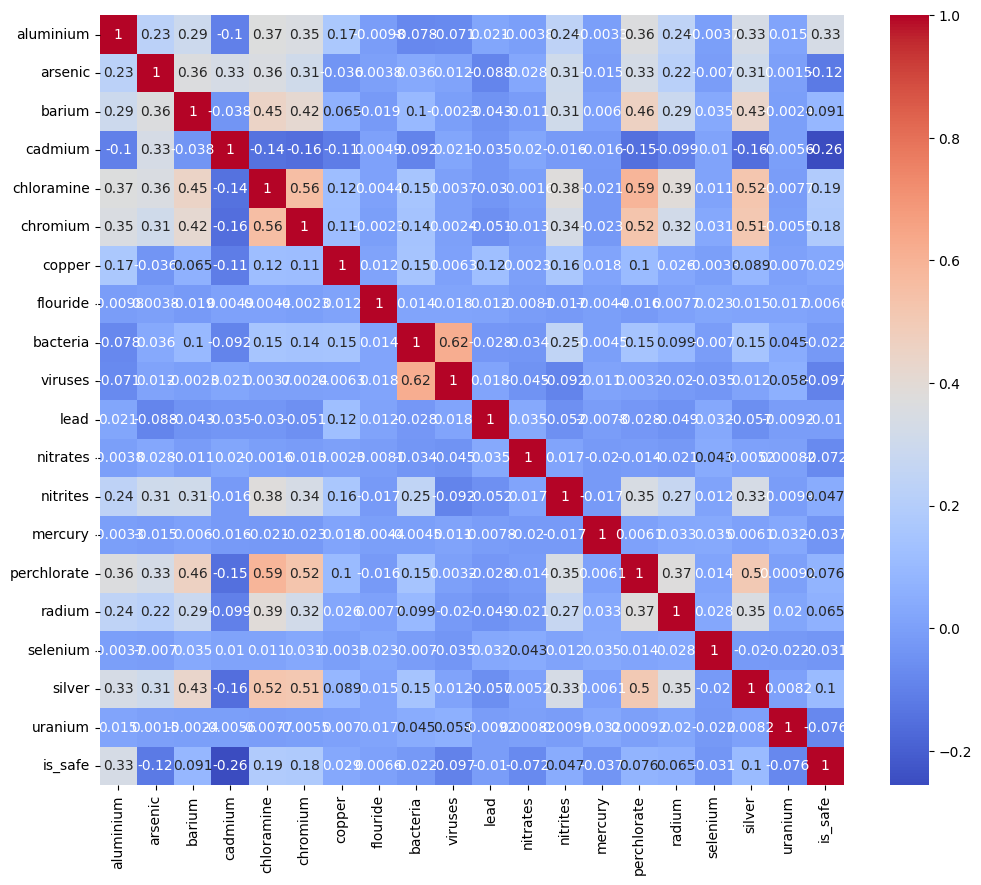

In [295]:
# podemos hacer un heatmap para visualizarlo mejor
plt.figure(figsize=(12, 10))
sns.heatmap(calidad.corr(), annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.show()

# aunque la correlacion no es enorme, SI QUE PODEMOS VER CIERTOS DATOS RELACIONADOS, COMO LOS VIRUSES Y LAS BACTERIAS
# O COMO LA CLORAMINA Y EL PERCLORATO O EL PERCLORATO Y EL CROMO. SIN EMBARGO, NO PARECEN ESTAR MUY RELACIONADAS CON EL TARGET NINGUNA DE LAS FEATURES.

In [296]:
# CON RESPECTO AL SEGUNDO DATASET, EL DE POTABILIDAD DEL AGUA QUE USAREMOS EN NO SUPERVISADO
agua_potable.info() # Tengo nulos en las columnas ph, sulfatos y Trihalomethanes. Dado que utilizare este dataset 
# como auxiliar y solo para el aprendizaje no supervisado, prefiero eliminar los nulos y quedarme solo con los registros completos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [297]:
agua_potable_sinnan = agua_potable.dropna()
agua_potable_sinnan.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

4. Limpia los datos: duplicados, missings, outliers, columnas inútiles...

In [298]:
# EN EL PRIMER DATASET, DE CALIDAD, teniamos tanto la columna target is_safe como la de amoniaco(ammonia) como objeto.
# Transformamos ambas en numerica
calidad['is_safe'] = pd.to_numeric(calidad['is_safe'], errors='coerce') # LOS CAMBIAMOS A NAN PARA ELIMINARLOS
calidad1 = calidad.dropna(subset=['is_safe'])


In [299]:
# Y TENGO QUE CAMBIAR EL AMONIACO A NUMERICO, QUE ES LA UNICA OTRA COLUMNA QUE ESTA COMO OBJETO
calidad1['ammonia'] = pd.to_numeric(calidad1['ammonia'], errors='coerce') 

C:\Users\Picar\AppData\Local\Temp\ipykernel_6716\1667868834.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:
calidad1.info() # y ya las tenemos en numericas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [301]:
# en el segundo DATASET de potabilidad, dado que solo vamos a usarlo en el aprendizaje no supervisado, como hemos expuesto anteriormente, ELIMINAMOS LOS NULOS
# AUNQUE EN CUALQUIER MOMENTO PODEMOS VOLVER AQUI E IMPUTARLOS SI ES NECESARIO.

5. Feature engineering: transformación y creación de nuevas variables.

In [302]:
#  Vamos a visualizar el porcentaje del target, si el agua es segura o no (RECORDEMOS, 0 ES AGUA NO SEGURA, 1 SEGURA)
calidad1['is_safe'].value_counts(normalize=True) # Para ver la division
# ¡¡el target esta totalmente desbalanceado HACIA EL CERO, QUE ES QUE EL AGUA ES NO SEGURA!!, 

0.0    0.885943
1.0    0.114057
Name: is_safe, dtype: float64

Tomaremos varias decisiones a partir de aqui. La primera, al estar el target DEMASIADO DESBALANCEADO, probaremos dos estrategias:
- Utilizaremos modelos que sean menos vulnerables a los outliers, vamos a probar modelos para clases desbalanceadas primero: AdaBoost, Gradient Boosting Machines (GBM) o modelos basados en árboles de decisión ponderados para tratar el desequilibrio de clases.
- Si eso no funciona, recurriremos a RESAMPLEAR, con SMOTE, y luego probar los modelos sobre el conjunto oversampleado. Sin embargo, tendremos en cuenta las desventajas antes de sacar conclusiones (los sesgos que se pueden introducir, el overfitting pues parte de datos que no son reales...)


6. Prueba varios modelos

In [303]:
# Extraemos X e Y
X = calidad1.drop('is_safe',axis=1)
y = calidad1['is_safe']

In [304]:
# normalizamos, ANTES QUE NADA
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)
X
# Hemos normalizado sobre todo el conjunto de X antes de dividir en train y test.
# Ya solo habria que normalizar si queremos añadir un nuevo dato, IMPORTANTE para que las conclusiones sean correctas.

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.63921743, ..., -1.72683135,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -0.59963176, ..., -1.72683135,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.59963176, ..., -1.72683135,
        -0.75098648,  0.19802266]])

In [305]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Total features shape:", X.shape)
print("Train features shape:", X_train1.shape)
print("Train target shape:", y_train1.shape)
print("Test features shape:", X_test1.shape)
print("Test target shape:", y_test1.shape)

Total features shape: (7996, 20)
Train features shape: (6396, 20)
Train target shape: (6396,)
Test features shape: (1600, 20)
Test target shape: (1600,)


In [306]:
# COMO HEMOS COMENTADO EN UN PRIMER MOMENTO, RECURRIREMOS A MODELOS MENOS SENSIBLES AL DESBALANCEO
# Empezamos con un random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,max_features=3, random_state=42)
model_rf.fit(X_train1, y_train1)
pred_rf = model_rf.predict(X_test1)
# y el accuracy
rf = accuracy_score(y_test1, pred_rf)
print(rf)
# el modelo tiene muy buena accuracy, hasta sin balancear!! pero tenemos que volver a revisar para evitar overfitting

0.950625


7. Analiza los resultados mediante una métrica adecuada a tu problemática.

¡OJO! Prefiero VISUALIZAR TODAS LAS METRICAS QUE SOLO EL ACCURACY, DADO QUE EL ACCURACY RECORDEMOS QUE PUEDE NO SER 
LA MEJOR PARA CLASES DESBALANCEADAS. Y EN ESTE CASO CONCRETO PARA ESTE TARGET(QUE EL AGUA SEA SEGURA O NO) SERIA MAS IMPORTANTE EL RECALL(también conocida como sensibilidad o tasa de verdaderos positivos),PUES MI PRIORIDAD debería ser identificar correctamente los casos en los que el agua no es segura (ME INTERESA LOS AUTENTICOS POSITIVOS DE LA CLASE 0 SOBRE TODO, QUE SON LOS NO SEGUROS), para poder tomar medidas preventivas o correctivas.

In [307]:
# Hacemos una validacion cruzada, para ver si los datos tienen sentido
from sklearn.model_selection import cross_val_score
model_rf_val = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
results_cv_rf = cross_val_score(model_rf_val, X_train1, y_train1, cv=10, scoring='recall') # HEMOS USADO EL RECALL, QUE ES EL QUE NOS INTERESA
print(results_cv_rf)
print(results_cv_rf.mean())
# en principio, todos los cortes tienen mas o menos lo mismo, pero la media es muy mala!!
# EL PROBLEMA DEL RECALL ES POR EL DESBALANCEO (se predice mejor la clase 0 que la 1), AL SER MAYORITARIA

[0.61971831 0.57746479 0.67605634 0.6056338  0.61111111 0.55555556
 0.63380282 0.64788732 0.57746479 0.63380282]
0.613849765258216


In [308]:
# USO CLASIFICACION REPORT, PARA VER todas las metricas
print(classification_report(y_test1,pred_rf)) 
# parece muy bueno el modelo si nos fiamos del accuracy, AUNQUE ES BASTANTE MEJOR PARA CLASIFICAR LA CLASE 0 (PREDOMINANTE)
# QUE LA 1 (LOS AUTENTICOS POSITIVOS DE LA CLASE 1 SE CLASIFICAN MUCHO PEOR). Esto es un problema.

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1400
         1.0       0.94      0.65      0.77       200

    accuracy                           0.95      1600
   macro avg       0.95      0.82      0.87      1600
weighted avg       0.95      0.95      0.95      1600



<Axes: >

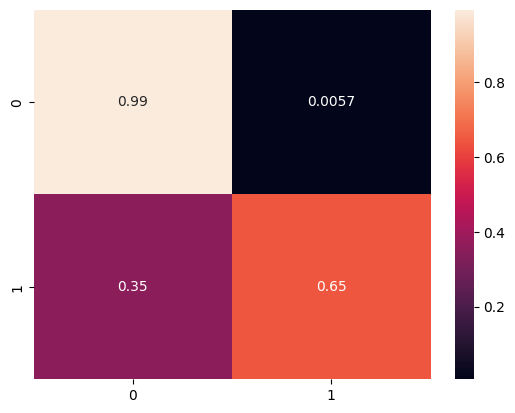

In [309]:
# y la matriz de confusion
sns.heatmap(confusion_matrix(y_test1, pred_rf , normalize='true'), annot=True)
# MUY DESBALANCEADO, Y POR ESO LA PREDICCION DEL NUMERO 1 ES MUCHO MAS MALA

In [310]:
# Hemos llevado a cabo el EXACTAMENTE el mismo procedimiento para ADABOOST, GRADIENT BOOSTING Y XGBOOST (en el notebook de pruebas calidad de agua supervisado estan completos
# incluidos sus cross validation, heatmaps y modelos entrenados)
# pero los resultados son muy parecidos, PEOR PREDICCION PARA LA CLASE 1, SIENDO XGBOOST EL QUE MEJOR RECALL TIENE, CON 80 POR CIENTO.

HE USADO ESTE COMANDO, %STORE, PARA NO TENER QUE COPIAR TODOS LOS MODELOS QUE NO SIRVEN EN ESTA MEMORIA
SI DESEAS VER CADA MODELO, ACUDIR AL NOTEBOOK CALIDAD AGUA SUPERVISADO

In [368]:
%store -r tabla_recall
print(tabla_recall) 

                     recall
Random Forest      0.613850
Ada Boosting       0.536444
Gradient Boosting  0.702289
XGBoost            0.764163


In [312]:
# y ordenamos
tabla_recall.sort_values(by=['recall'], ascending=False)
# Tenemos que tener en cuenta que este recall es la media de LA CLASIFICACION DE LA CLASE 0 Y LA 1 TRAS EL CROSS VALIDATION, 
# Y LA DE LA CLASE 1 ES PEOR. AUNQUE EN OTRAS METRICAS LOS MODELOS SON MEJORES, el problema de la diferencia en clasificacion
# de las dos  clases habria que intentar arreglarlo.

,recall
XGBoost,0.764163
Gradient Boosting,0.702289
Random Forest,0.613850
Ada Boosting,0.536444


8. Interpreta los resultados y comprende los outputs del modelo.

In [313]:
# SI QUEREMOS PROBAR ALGO PARA EQUIPARAR LA CLASES, DADO QUE ES MUY OBVIO QUE LA CLASIFICACION DE LA CLASE 1 
# ES PEOR QUE DE LA CERO A PESAR DE HABER ELEGIDO MODELOS CONTRA EL DESBALANCEO,
# PUES EL TARGET NO ESTA UN POCO, SI NO MUY DESBALANCEADO (88-11)
# PARA EVITAR VERNOS INFLUENCIADOS POR LA CLASE DOMINANTE 0(EN ESTE CASO, QUE EL AGUA SEA NO SEGURA) PROBAREMOS A RESAMPLEAR
!pip install imbalanced-learn # me descargo este modulo
from imblearn.over_sampling import SMOTE # oversampling, INTRODUCIMOS DATOS FICTICIOS DE LA CLASE MENOR
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [314]:
# y lo intentaremos asi, AUNQUE HAY QUE TENER CUIDADO Y REVISAR SI SE HAN INTRODUCIDO SESGOS EN LOS DATOS, AUNQUE ES DIFICIL DE SABER
# Y REVISAR MUY BIEN EL OVERFITTING
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Total features shape:", X.shape) # ANTES DEL RESAMPLEO
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (7996, 20)
Train features shape: (11334, 20)
Train target shape: (11334,)
Test features shape: (2834, 20)
Test target shape: (2834,)


In [315]:
# y empezamos a probar modelos. Empezamos con REGRESION LOGISTICA, LUEGO SVM, DECISSION TREE Y LUEGO PASAMOS A LAS TÉCNICAS ENSEMBLES
# COMO LAS PROBADAS ANTERIORMENTE (RANDOM FOREST, ADABOOST,GRADIENT BOOSTING Y XGBOOST). 
# COMO HICIMOS ANTES DE OVERSAMPLEAR, Y DADO QUE TODOS LOS MODELOS ESTAN EN EL NOTEBOOK DE CALIDAD DE AGUA SUPERVISADO,
# GUARDAREMOS LAS VARIABLES DE LAS METRICAS PARA QUE PODAMOS VISUALIZARLAS AQUI.

In [316]:
%store -r metricas_regresion
print(metricas_regresion) # METRICAS DEL MODELO DE REGRESION OVERSAMPLEADO
# NO ESTA MAL, Y PARECE QUE SE EQUILIBRAN LAS METRICAS EN AMBAS CLASES

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1420
         1.0       0.81      0.79      0.80      1414

    accuracy                           0.80      2834
   macro avg       0.80      0.80      0.80      2834
weighted avg       0.80      0.80      0.80      2834



In [317]:
# sin embargo, tras la validation cruzada, observamos que LOS CORTES PUEDEN DIFERIR BASTANTE, LO QUE PUEDE SIGNIFICAR OVERFITTING
%store -r results
print(results) # parece que hay algunos cortes que funcionan bastante mejor que otros.
# ALGUNOS ESTAN A 0,64 Y OTROS A 0,88, PUEDE SER QUE NO SEA EL MEJOR MODELO.

[0.8787024  0.64598025 0.82510578 0.79125529 0.78389831 0.81214689
 0.78389831 0.77824859 0.78954802 0.78248588]


In [318]:
# vemos el resultado del classification report de SVM (recordemos que el modelo entrenado y preparado esta en el notebook de calidad agua supervisado)
%store -r metricas_svm
print(metricas_svm) # muy similar a los resultados de regresion logistica, no esta mal, pero no creo que sea el mejor modelo

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1420
         1.0       0.81      0.79      0.80      1414

    accuracy                           0.81      2834
   macro avg       0.81      0.81      0.81      2834
weighted avg       0.81      0.81      0.81      2834



In [319]:
# luego, decission tree classifier
%store -r metricas_decission_tree
print(metricas_decission_tree) # EL MODELO NO ES MALO,DE HECHO EL RECALL ES EL MEJOR DE TODOS EN LA CLASIFICACION DE LA CLASE 1.
# pero vamos a hacer la validacion cruzada, para comprobar que no hay overfitting

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1420
         1.0       0.87      0.88      0.88      1414

    accuracy                           0.88      2834
   macro avg       0.88      0.88      0.88      2834
weighted avg       0.88      0.88      0.88      2834



In [320]:
%store -r val_arbol
print(val_arbol) # empeora especialmente, en cada corte, hay algunos que estan en 59 y otros en 94, SEÑAL DE OVERFITTING

[0.96191819 0.59661495 0.86882934 0.92665726 0.94632768 0.96610169
 0.90960452 0.86440678 0.86440678 0.90677966]


In [321]:
# LOS TRES MODELOS PROBADOS HASTA AHORA, REGRESION LOGISTICA, SVM Y DECISSION TREE NO PARECEN LOS BASTANTE ADECUADOS.
# EMPEZAMOS A PROBAR ENSEMBLES
# Empezamos con un random forest
from sklearn.ensemble import RandomForestClassifier
model_rf_resampleado = RandomForestClassifier(n_estimators=100,max_features=3, random_state=42)
model_rf_resampleado.fit(X_train, y_train)
pred_rf_resampleado = model_rf_resampleado.predict(X_test)
# Hacemos una validacion cruzada, para ver si los datos tienen sentido
from sklearn.model_selection import cross_val_score
model_rf_val_res = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
results_cv_rf_res = cross_val_score(model_rf_val_res, X_train, y_train, cv=10, scoring='recall')
print(results_cv_rf_res)
print(results_cv_rf_res.mean())

[0.98765432 0.98589065 0.98589065 0.98589065 0.99118166 0.97530864
 0.97883598 0.98236332 0.98589065 0.98941799]
0.9848324514991182


              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1420
         1.0       0.97      0.99      0.98      1414

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834



<Axes: >

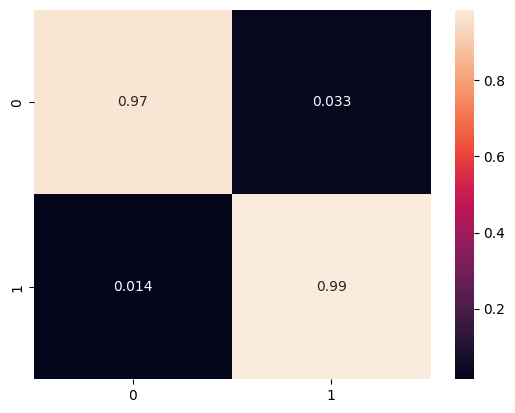

In [322]:
# USO CLASIFICACION REPORT, PARA VER todas las metricas
print(classification_report(y_test,pred_rf_resampleado))
# y la matriz de confusion
sns.heatmap(confusion_matrix(y_test, pred_rf_resampleado, normalize='true'), annot=True)

In [323]:
# tambien podemos sacar la importancia de las features
model_rf_resampleado.feature_importances_ 

array([0.18624365, 0.02300383, 0.08350415, 0.02239362, 0.09597662,
       0.06484145, 0.05305121, 0.03398848, 0.01444469, 0.0289111 ,
       0.0483105 , 0.0249403 , 0.03433571, 0.04609775, 0.01280134,
       0.07785226, 0.02829767, 0.01931442, 0.05931476, 0.04237648])

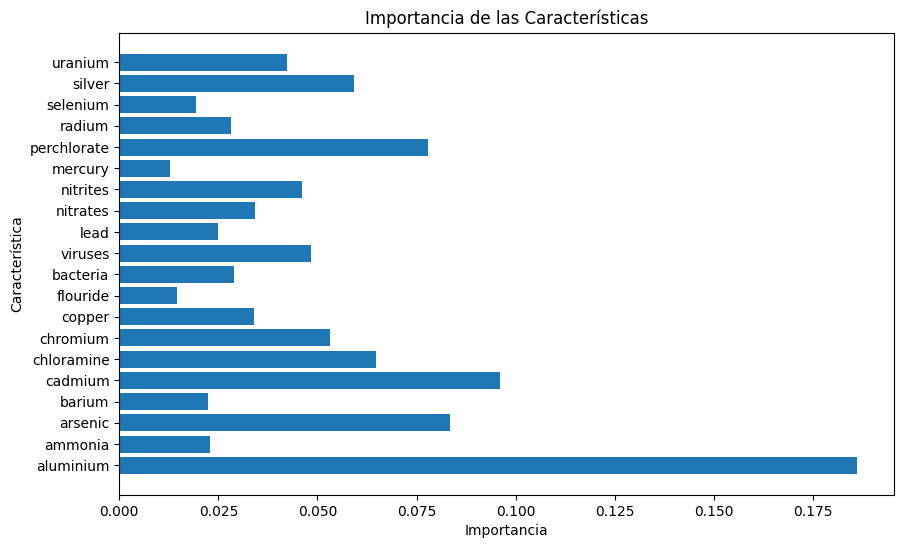

In [324]:
# y representamos la importancia en un grafico
X_importancia = calidad1.drop(['is_safe'],axis=1)
importancias = model_rf_resampleado.feature_importances_
nombres_caracteristicas = X_importancia.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(nombres_caracteristicas)), importancias, align='center')
plt.yticks(range(len(nombres_caracteristicas)), nombres_caracteristicas)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()
# en este modelo, la importancia esta mas repartida entre todas las variables que en el modelo decission tree.

In [325]:
# HACEMOS LO MISMO CON LOS MODELOS ADABOOST, GRADIENT BOOSTING Y XGBOOST (ENTRENAMIENTO DEL MODELO, CROSS VALIDATION, CLASSIFICATION REPORT,IMPORTANCIA DE LAS FEATURES Y SU REPRESENTACION Y HEATMAP),
# EN EL NOTEBOOK DE CALIDAD AGUA SUPERVISADO ESTAN COMPLETOS.
# Y OBTENEMOS El RECALL en cada modelo, QUE ERA NUESTRO OBJETIVO (que sacamos del otro notebook)
%store -r tabla_recall_resampleado
tabla_recall_resampleado.sort_values(by=['recall'], ascending=False)
# EL RECALL HA AUMENTADO HASTA CASI LOGRAR LA PERFECCION, SOBRE TODO EN EL CASO DE RANDOM FOREST, INCLUSO SIN HIPERPArAMETRIZAR!!
# SVC Y REGRESION LOGISTICA ES EL QUE FUNCIONA PEOR EN ESTE CASO, DE MODO QUE PODEMOS INTENTAR HIPERPARAMETRIZAR SOLO RANDOM FOREST Y XGBOOST,
# LOS DOS MEJORES A NIVEL DE DATOS PARA VER SI LOGRAMOS INCLUSO MEJORAR SU YA ALTISIMA PRECISION.


,recall
Random Forest,0.983951
XGBoost,0.976190
Gradient Boosting,0.973016
Ada Boosting,0.886772
DecissionTree Classifier,0.881165
Regresion logistica,0.787127
SVC,0.784874


In [326]:
# FINALMENTE, HIPERPARAMETRIZAMOS LOS 2 MEJORES MODELOS, RANDOM FOREST Y XGBOOST
# Lo que nos queda, HIPERPARAMETRIZAR (ENCONTRAR PARAMETROS OPTIMOS PARA LOS MEJORES MODELOS,
# EN ESTE CASO, RANDOM FOREST Y XGBOOST), elegir con un gridsearch y especificar los pasos QUE HEMOS SEGUIDO
# EMPEZAMOS CON RANDOM FOREST
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [50,100,],
              'max_features': [2,3,4,5],
              'max_depth': [2,3,4,5]
            }

modelo_RF = RandomForestClassifier(random_state=42)

rf_gs = GridSearchCV(modelo_RF, parameters, cv=3, scoring='recall')

rf_gs.fit(X_train, y_train)
print(rf_gs.best_estimator_)
print(rf_gs.best_score_)
print(rf_gs.best_params_) # el best score, para evitar el overfitting y con una buena robustez,0,95 aunque en el cross value
# tenia 0,98, mayor aun sin parametrizar. Puede ser que hallamos usado demasiados parametros, o que no fueran los adecuados
# o que la validacion cruzada 3 sea insuficiente'''

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=50,
                       random_state=42)
0.9477954144620812
{'max_depth': 5, 'max_features': 5, 'n_estimators': 50}


In [327]:
# y un resumen de sus metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
y_pred_rf= rf_gs.best_estimator_.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred_rf))
print('Precision', precision_score(y_test, y_pred_rf))
print('Recall', recall_score(y_test, y_pred_rf))
print('ROC', roc_auc_score(y_test, y_pred_rf))

Accuracy 0.9428369795342273
Precision 0.9264305177111717
Recall 0.9618104667609618
ROC 0.9428770643663963


<Axes: >

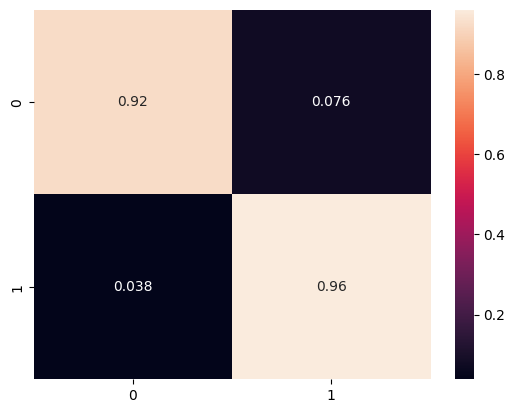

In [328]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf, normalize='true'), annot=True)
# Hemos visto que tras usar grid search empeoran incluso las metricas, puede ser porque he elegido demasiados 
# parametros, por las muestras, PORQUE ANTES TENIAMOS OVERFITTING AUNQUE NO LO LOCALIZARAMOS...

In [329]:
# y ahora con XGBOOST
from xgboost import XGBRFClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [25, 50,75],
              'max_depth': [3,4,5],
              'learning_rate': [0.1,0.5,0.7]
            }


modelo_xgboost = XGBRFClassifier(random_state=42)

xgb_gs = GridSearchCV(modelo_xgboost, parameters, cv=3, scoring='recall')

xgb_gs.fit(X_train, y_train)
print(xgb_gs.best_estimator_)
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=25, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, ...)
0.9724867724867726
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 25}


In [330]:
y_pred_xgb = xgb_gs.best_estimator_.predict(X_test)

# y su resumen de metricas
print('Accuracy', accuracy_score(y_test, y_pred_xgb))
print('Precision', precision_score(y_test, y_pred_xgb))
print('Recall', recall_score(y_test, y_pred_xgb))
print('ROC', roc_auc_score(y_test, y_pred_xgb))
# Tampoco han mejorado, incluso ha empeorado ligeramente.

Accuracy 0.940014114326041
Precision 0.9124668435013262
Recall 0.9731258840169731
ROC 0.9400840687690499


<Axes: >

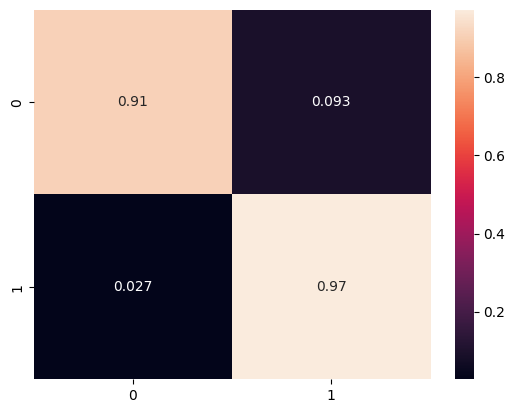

In [331]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True)

In [332]:
# Conclusion, tras la hiperparametrizacion, ambos modelos empeoran. Puede ser que hallamos usado demasiados parametros, o que no fueran los adecuados,
# que la validacion cruzada 3 que hemos seleccionado sea insuficiente, por las muestras, PORQUE ANTES TENIAMOS OVERFITTING AUNQUE NO LO LOCALIZARAMOS...'''

ESTOS DOS ULTIMOS MODELOS, RANDOM FOREST Y XGBOOST, AL SER LOS QUE TIENE MEJORES RESULTADOS, SERÁN LOS QUE GUARDE EN MIS SCRIPT DE LOS MODELOS

9. Siguientes pasos. ¿Se puede enriquecer el modelo con otras pruebas o con otros datos?

Como ya comentamos en el objetivo del proyecto, dado que solo conociendo las concentraciones de los contaminantes permitidas segun la legislacion sobre materia de agua ya podríamos determinar si es segura o no para el consumo (si sobrepasan su umbral, el agua esta contaminada) aunque tu no le aportes esos datos al modelo, con un algoritmo sencillo podríamos obtener el target por lo que puede ser muy útil usar el aprendizaje no supervisado por encima del supervisado.


 Nos aportaría mucha más información útil para la exploración de posibles patrones ocultos entre features, descubrir nueva información, crear relaciones entre componentes que en un principio no se aprecian, detectar otras anomalías o incluso VER SEGMENTACIONES EN LAS MUESTRAS DE AGUA FORMADAS EN LOS CLUSTER. Nos hemos servido también del otro dataset, de potabilidad, puesto que tiene otras caracteristicas muy interesantes tales como el pH, la turbidez, la dureza... que no tenemos en el inicial y que pueden complementarse con los contaminantes ya estudiados.

 Todas las conclusiones extraidas podrían darnos pie a proponer iniciativas únicas que en un primer momento con los datos rasos no nos plantearíamos (por si algún componente tiene mas relación con la variabilidad, si es mas importante o forma una tupla interesante con otro u otros...)

¿Qué quiere decir? que deberia estudiar con aprendizaje no supervisado mis datos para ver como se reunen las sustancias, hacer PCA PARA REDUCIR LA DIMENSIONALIDAD (recordemos que en el supervisado vimos que la mitad de los contaminantes no se tenian en consideracion para algunos modelo), hacer clusters y ver que otro tipo de pruebas podria hacer para obtener datos concretos y poder determinar con las minimas pruebas posibles si el agua es segura o no.

In [333]:
# Si quiero comenzar con el aprendizaje no supervisado, puedo eliminar las variables objetivos de ambos dataset (potabilidad e is_safe)
# para empezar a aplicar PCA (en el caso del dataset de calidad) y clustering directamente en el de potabilidad (no tienen tantas columnas como para disminuir la dimensionalidad)
calidad_sin_target = calidad1.drop(columns=['is_safe']).dropna() # uso el dropna, porque en la columna amonio habia 3 valores nulos (!#NUM) generados tras su cambio de objeto a float,
potabilidad_sin_target = agua_potable_sinnan.drop(columns=['Potability'])

In [334]:
# Guardamos las etiquetas por si tenemos que volver a usarlos para los cluster
target_calidad = calidad1[['is_safe']]
target_potabilidad = agua_potable_sinnan[['Potability']]

In [335]:
# y comenzamos, PRIMERO UN PCA PARA EL DATASET DE CALIDAD, pero ¿COMO SE CUANTOS COMPONENTES NECESITO PARA EXPLICAR EL 90% DE NUESTROS DATOS?
# QUE BASICAMENTE ES PARA LO QUE LO NECESITO. Hare ensayos, y empezare sin darle un numero de componentes
from sklearn.decomposition import PCA
pca = PCA() # lo hago en un principio sin componentes, TRAS GRAFICAR PODREMOS SELECCIONARLOS MEJOR
pca.fit(calidad_sin_target)

PCA()

In [336]:
# Una vez realizado, PODEMOS OBTENER LOS COMPONENTES PRINCIPALES
componentes_principales = pca.components_ # LOS COMPONENTES
varianza_explicada = pca.explained_variance_ratio_ # LA VARIANZA EXPLICADA

for i in range(len(varianza_explicada)): # Y ASI PODEMOS VERLOS, AUNQUE LA VISUALIZACION ES REGULAR
    print(f'Componente Principal {i + 1}:')
    print(componentes_principales[i])
    print(f'Varianza Explicada por el Componente Principal: {varianza_explicada[i]}')
    print()

Componente Principal 1:
[ 2.61628102e-02  6.06339835e-02  4.76244781e-03  3.19284630e-02
 -3.03446937e-04  8.64341525e-02  8.06871931e-03  3.87963906e-03
 -4.13373761e-04  2.77586066e-03  1.26566408e-04 -9.45067460e-05
 -4.77581723e-03  1.11755843e-02  1.14384781e-06  9.92167557e-01
  4.97681339e-02  2.50960736e-05  4.10810793e-03  2.21440179e-06]
Varianza Explicada por el Componente Principal: 0.7234158106244194

Componente Principal 2:
[-3.46183487e-03 -9.97938697e-01 -2.02325926e-04 -2.01401907e-03
 -4.76479397e-05 -1.02661796e-02 -1.89975915e-03 -2.56415056e-04
  1.30045713e-03 -1.71198084e-03 -4.53191751e-03  2.21873857e-04
 -8.50845484e-03  6.84455227e-03 -6.72470764e-06  6.20193087e-02
 -1.51274175e-03 -9.27473101e-05 -2.44447930e-04 -4.44087827e-05]
Varianza Explicada por el Componente Principal: 0.17769662248601115

Componente Principal 3:
[ 3.29299558e-04 -8.18027204e-03  1.48537966e-03 -1.03140855e-03
  1.16148790e-04  3.49025130e-03 -2.71230276e-04  4.75090725e-04
 -6.46689

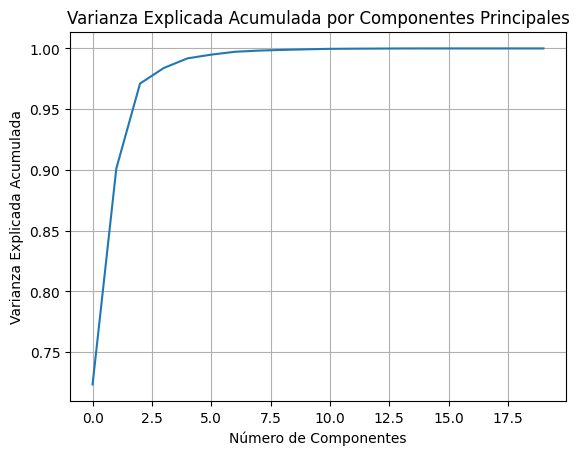

In [337]:
# ¿COMO SELECCIONAR LOS COMPONENTES? LA MANERA MAS FACIL DE OBTENERLOS ES EN UNA GRAFICA
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()

# SIGUIENDO LA REGLA DEL CODO, PODRIAMOS VER QUE A PARTIR DE 2 COMPONENTES, ESTAS EXPLICANDO MAS DEL 95 POR CIENTO DE VARIANZA

In [338]:
# AUNQUE SI QUEREMOS ESTAR COMPLETAMENTE SEGUROS, HAY UN METODO QUE NO ES A OJO
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)
num_componentes_90 = np.argmax(varianza_explicada_acumulada >= 0.9) + 1  # Encontrar el número de componentes necesarios para alcanzar el 90% de varianza explicada
#+1 porque el índice comienza en 0
print(f"Número de componentes para alcanzar el 90% de varianza explicada: {num_componentes_90}")

Número de componentes para alcanzar el 90% de varianza explicada: 2


In [339]:
# ASI QUE PODEMOS VOLVER A HACERLO, ESTA VEZ CON 2 COMPONENTES
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para visualización
componentes_principales = pca.fit_transform(calidad_sin_target)
# Y YA TENEMOS LOS COMPONENTES PRINCIPALES, PODEMOS EMPEZAR A ANALIZAR DATOS Y TENDENCIAS

In [340]:
# EMPEZARE CREANDO UN DATAFRAME CON MIS PRINCIPAL COMPONENTES DEL DATASET DE CALIDAD
componentes = pd.DataFrame(componentes_principales).rename(columns={0: 'PC1', 1: 'PC2'})
componentes

,PC1,PC2
0,20.873888,6.459640
1,16.517385,-5.861633
2,33.872266,2.291593
3,-6.983967,2.500740
4,1.034368,-9.980941
...,...,...
7991,-13.443217,5.672153
7992,-14.564640,-10.828574
7993,-15.620958,6.447034
7994,-16.734421,3.332056


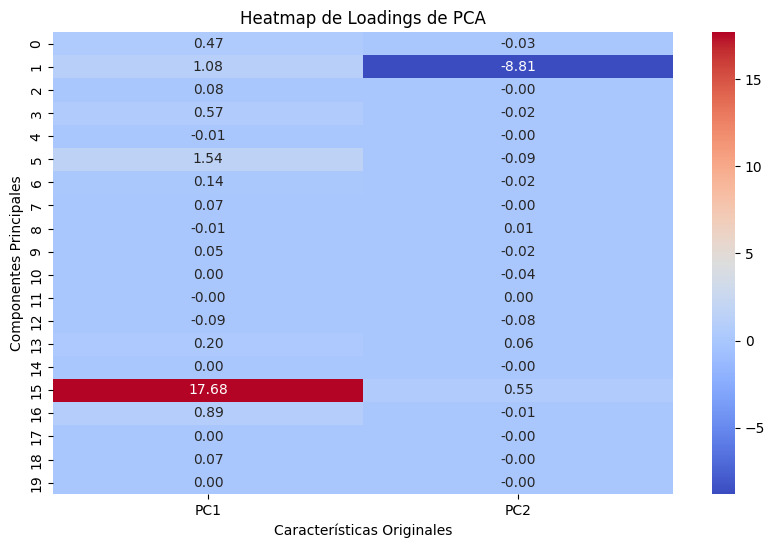

In [341]:
# ¿Como veo la relacion entre mis features originales (aluminio, amoniaco...) y mis componentes? 
# Usamos los loadings o coeficientes  y creamos un heatmap
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) # se calculan multiplicando las matrices de los componentes principales por la matriz de datos centrados reducidos
# Y REPRESENTAMOS
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=componentes.columns)
plt.title('Heatmap de Loadings de PCA')
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.show()

PRIMERAS CONCLUSIONES
1.	Las características con cargas altas (positivas o negativas) en los componentes principales son las que más influyen en la variabilidad del conjunto de datos. En mis datos, parece que una característica tiene una carga alta positiva (17.68), EL PERCLORATO en PC1, mientras que otra característica tiene una carga alta negativa (-8.81), EL AMONIACO, en PC2.
2.	Características irrelevantes: La mayoría de las características tienen cargas bajas en ambos componentes principales, lo que sugiere que no contribuyen significativamente a la variabilidad. Puedes considerar eliminar estas características si buscas simplificar tu modelo, LA ELIMINAREMOS PARA LOS CLUSTER
3.	Correlaciones: Si dos características tienen cargas similares en los mismos componentes principales, podrían estar correlacionadas. Esto podría indicar que están relacionadas de alguna manera en tu conjunto de datos original (ejemplo, el componente 7 el 18, AUNQUE SON TAN POCO SIGNIFICATIVAS QUE NO MERECE LA PENA ESTUDIARLAS EN PRINCIPIO)
4. Relación entre PC1 y PC2:Dado que estas dos características tienen cargas significativas en diferentes componentes principales, podrían estar relacionadas de alguna manera. Puede ser interesante explorar si hay alguna correlación entre el perclorato y el amoníaco en tu conjunto de datos original.
LA EXPLICACION DE PC1 PODRIA ENTENDERSE COMO ALTO PERCLORATO Y PC2 COMO BAJO AMONIACO

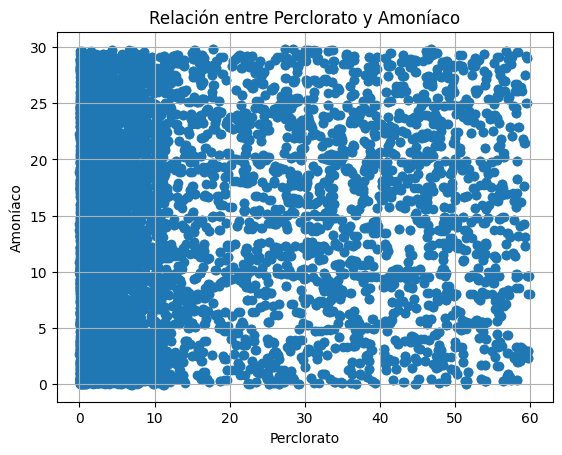

In [342]:
# Creo gráfico de dispersión para comparar ambas features
plt.scatter(calidad_sin_target['perchlorate'],calidad_sin_target['ammonia'])
plt.xlabel("Perclorato")
plt.ylabel("Amoníaco")
plt.title("Relación entre Perclorato y Amoníaco")
plt.grid(True)
plt.show()
# en principio, no se ve ninguna relacion entre los datos de ambas.
# DE HECHO, EN LA VIDA REAL, NO TIENEN UNA RELACION MUY ESTRECHA, AUNQUE EXISTEN ALGUNAS INTERACCIONES ESPECIFICAS ENTRE EL CLORO Y EL AMONIACO
# QUE PRODUCEN PERCLORATOS, PERO NO ES LO COMÚN.

Una posible explicación teórica podría ser que el perclorato y el amoniaco representan dos fuentes de contaminación o características del agua que tienen efectos distintos en la calidad del agua Y PUEDEN PROVENIR DE DISTINTOS ORIGENES  .

- Perclorato: El perclorato puede estar presente en las aguas por descargas industriales, desechos de fuegos artificiales, actividades militares (en los cohetes y explosivos militares). Por lo tanto, la variabilidad en el perclorato podría reflejar diferencias en la contaminación industrial en las diferentes muestras de agua.

- Amoniaco: Por otro lado, el amoniaco puede estar relacionado con la contaminación orgánica o con actividades agrícolas, como el uso de fertilizantes. Su presencia en el agua puede ser el resultado de la escorrentía de campos agrícolas o del tratamiento de aguas residuales. La variabilidad en el amoniaco podría reflejar diferencias en la contaminación orgánica o agrícola en las muestras de agua.

la diferencia de estas dos sustancias en las componentes principales sugiere que la variabilidad en la calidad del agua puede estar influenciada por diferentes fuentes de contaminación o características, y comprender estas diferencias puede ser importante para la gestión y el tratamiento del agua.

In [343]:
# Ya puedo reducir la dimensionalidad y crear clusters, que seran mas significativos PUES ELIMINAREMOS LAS FEATURES IRRELEVANTES 
# VAMOS A ELIMINAR TODAS LAS FEATURES CUYA RELACION CON AMBOS COMPONENTES de la PCA SEA POR DEBAJO DE 0,1
# LA 2, LA 4,LA 7, LA 8,LA 9, LA 10, LA 11,LA 12, LA 14, 17,18,19 LAS ELIMINAMOS y nos quedamos con las mas relevantes
columnas_a_borrar = [2, 4, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19]
calidad_filtrada = calidad_sin_target.drop(columns=calidad_sin_target.columns[columnas_a_borrar])

In [344]:
# vamos a normalizar primero, QUE VIENE MUY BIEN ANTES DE APLICAR KMEANS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
calidad_normalizada = scaler.fit_transform(calidad_filtrada)
calidad_filtrada = pd.DataFrame(calidad_normalizada, columns=calidad_filtrada.columns)

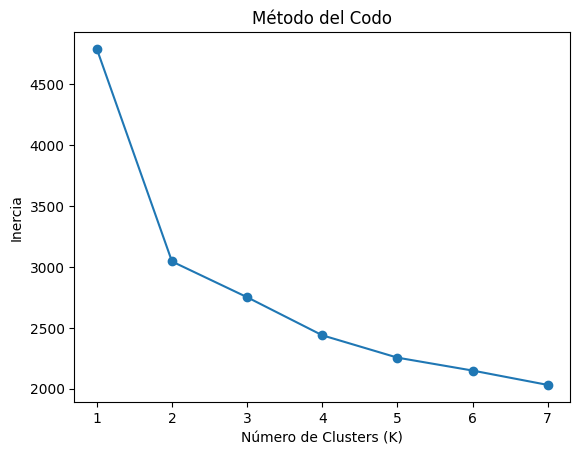

In [345]:
from sklearn.cluster import KMeans
inercia = [] # CREAMOS UNA LISTA VACIA, DONDE IREMOS INTRODUCIENDO LOS VALORES DE INERCIA
for k in range(1, 8):  # Probamos desde 1 hasta 7 clusters
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(calidad_filtrada)
    inercia.append(kmeans.inertia_)

# Y VISULIZAMOS
plt.plot(range(1, 8), inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [346]:
# Parece que el codo se forma a partir del cluster 2, pero haremos silhoutte (OTRO METODO PARA SELECCIONAR LOS CLUSTERS ADECUADOS)
# para ver si tenemos mas informacion

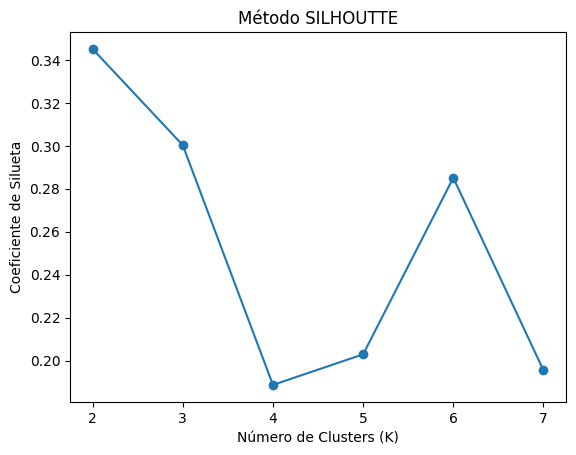

In [347]:
from sklearn.metrics import silhouette_score

coeficientes_silueta = [] # CREAMOS LISTA VACIA PARA LOS DISTINTOS COEFICIENTES DE SILUETA
for k in range(2, 8):  # Probamos desde 2 hasta 7 clusters
    kmeans = KMeans(n_clusters=k,n_init='auto')
    etiquetas = kmeans.fit_predict(calidad_filtrada)
    coeficiente_silueta = silhouette_score(calidad_filtrada, etiquetas)
    coeficientes_silueta.append(coeficiente_silueta)

# Y DIBUJAMOS
plt.plot(range(2, 8), coeficientes_silueta, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método SILHOUTTE')
plt.show()
# y efectivamente, el punto mas alto serian 2 clusters, de modo que es lo que haremos aunque parezcan pocos

In [348]:
# segun silhoutte y el metodo del codo, cogemos 2 clusters
kmeans_calidad = KMeans(n_clusters=2)  # incluimos los 2 clusters
clusters_calidad = kmeans_calidad.fit_predict(calidad_filtrada)

c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 0:
         aluminium      ammonia       barium   chloramine     chromium  \
count  4187.000000  4187.000000  4187.000000  4187.000000  4187.000000   
mean      0.013854     0.444019     0.178532     0.030405     0.065021   
std       0.040977     0.296859     0.155459     0.064843     0.067817   
min       0.000000     0.002674     0.000000     0.000000     0.000000   
25%       0.005941     0.180816     0.066802     0.005760     0.033333   
50%       0.009901     0.420789     0.137652     0.011521     0.055556   
75%       0.015842     0.699365     0.228745     0.033410     0.088889   
max       0.952475     0.998663     0.987854     0.870968     0.888889   

          nitrites  perchlorate       radium  cluster  
count  4187.000000  4187.000000  4187.000000   4187.0  
mean      0.368187     0.062521     0.227110      0.0  
std       0.213557     0.069645     0.220122      0.0  
min       0.000000     0.000000     0.000000      0.0  
25%       0.184300     0.011331     0.0613

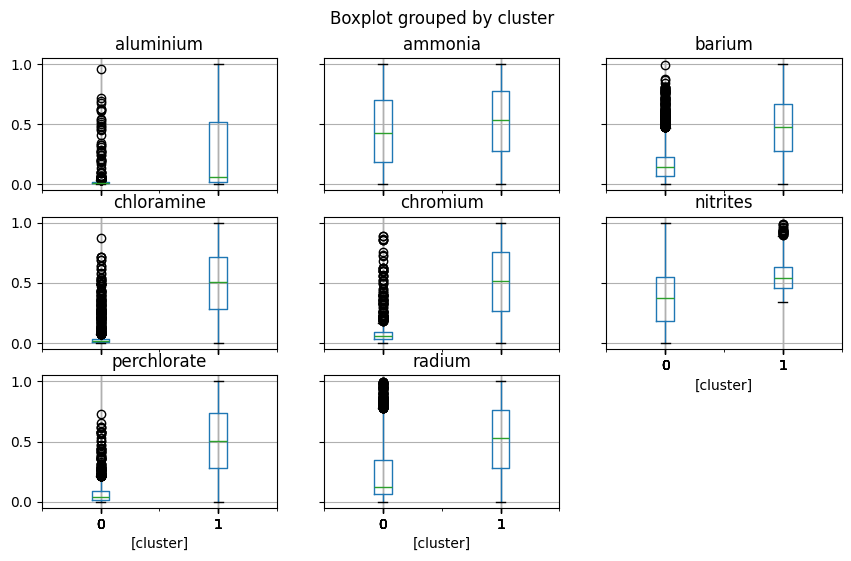

In [349]:
# AHORA, VAMOS A ANALIZAR LOS CLUSTERS QUE HEMOS CREADO PARA EL DATASET DE CALIDAD, A VER SI ENCONTRAMOS RELACIONES SIGNIFICATIVAS.
# PARA PODER HACERLO, CREARE UNA COLUMNA EN MI DATASET, DE CALIDAD Y AÑADIRE LAS ETIQUETAS de los cluster
calidad_clusterizada = calidad_filtrada.copy()  # hago una copia
calidad_clusterizada['cluster'] = clusters_calidad# asi, tenemos las etiquetas de los cluster en cada columna

grouped_data1 = calidad_clusterizada.groupby('cluster') # es necesario agrupar, SI NO, NO VERIAMOS LOS GRUPOS

for cluster, group in grouped_data1: # PARA VER LAS CARACTERISTICAS
    print(f"Cluster {cluster}:")
    print(group.describe())
    print("\n")

#  SI QUIERO VERLO EN GRAFICOS, un boxplot de cada característica por cluster:
calidad_clusterizada.boxplot(by='cluster', figsize=(10, 6))
plt.show()

PRIMERAS CONCLUSIONES:
En el cluster 0 parece que hay muchos mas outliers que en el 1.
Parece que el Cluster 0 tiene más puntos fuera del rango intercuartílico (outliers) en comparación con el Cluster 1. Esto podría deberse a varias razones:
-Distribución de datos: La distribución de los datos en el Cluster 0 puede ser más dispersa o tener una mayor variabilidad en comparación con el Cluster 1. El cluster 1 podría tener una estructura más clara en comparación con el otro. Los pocos outliers podrían indicar que la mayoría de los puntos de datos en este cluster siguen un patrón similar y están más cerca unos de otros en el espacio de características
-Densidad de puntos: Si el Cluster 0 tiene una mayor densidad de puntos en ciertas áreas, es más probable que algunos de esos puntos se encuentren fuera del rango intercuartílico.
-Características específicas: Las sustancias químicas representadas pueden tener características particulares que afectan su distribución en los clusters. Por ejemplo, algunas sustancias pueden ser más propensas a valores extremos debido a su naturaleza química.
-Parámetros del algoritmo KMeans: Los resultados también pueden depender de los parámetros utilizados en el algoritmo KMeans, como el número de clusters o la inicialización de centroides.
En resumen, la presencia de outliers en el Cluster 1 podría indicar que este grupo de sustancias químicas tiene una mayor variabilidad o una distribución menos uniforme en comparación con el Cluster 0. Para obtener una comprensión más profunda, sería necesario analizar las características específicas de las sustancias químicas y ajustar los parámetros del algoritmo según sea necesario.

In [350]:
# PODEMOS VER EL CLUSTER UNO, si quiero ver que datos estan dentro DE UN CLUSTER.
labels = pd.Series(kmeans_calidad.labels_, index=calidad_filtrada.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data = pd.concat([calidad_filtrada, labels], axis=1) # incluyo una columna, CON LA CLASIFICACION DE LOS CLUSTER
cluster_1 = clustered_data[clustered_data['cluster'] == 1] # Filtramos los datos en el cluster 1

In [351]:
cluster_1.describe()

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,cluster
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.0
mean,0.261786,0.519314,0.470037,0.493222,0.505350,0.548061,0.507254,0.517561,1.0
std,0.312675,0.291633,0.237038,0.258538,0.288578,0.115291,0.271094,0.282827,0.0
min,0.000000,0.000000,0.002024,0.000000,0.000000,0.341297,0.001166,0.000000,1.0
25%,0.013861,0.278075,0.273279,0.282258,0.266667,0.457338,0.276121,0.280350,1.0
50%,0.059406,0.532086,0.477733,0.503456,0.511111,0.542662,0.507082,0.529412,1.0
75%,0.516832,0.776404,0.668016,0.715438,0.755556,0.631399,0.738044,0.762203,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.986348,1.000000,1.000000,1.0


In [352]:
# si quiero ver que datos estan dentro DE MI CLUSTER 0.
labels = pd.Series(kmeans.labels_, index=calidad_filtrada.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data = pd.concat([calidad_filtrada, labels], axis=1)
cluster_0 = clustered_data[clustered_data['cluster'] == 0] # Filtramos los datos en el cluster 0

In [353]:
cluster_0.describe()

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,cluster
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.0
mean,0.012058,0.734728,0.175092,0.027081,0.066087,0.304022,0.060386,0.174797,0.0
std,0.020755,0.150261,0.149195,0.051725,0.067819,0.197628,0.063300,0.158586,0.0
min,0.000000,0.413436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.005941,0.610879,0.070344,0.005760,0.033333,0.139932,0.010498,0.055069,0.0
50%,0.009901,0.744987,0.137652,0.011521,0.055556,0.276451,0.042160,0.113267,0.0
75%,0.015842,0.864305,0.216599,0.033410,0.088889,0.470990,0.090527,0.264080,0.0
max,0.338614,0.998663,0.842105,0.641705,0.722222,0.924915,0.561240,0.843554,0.0


In [354]:
# COMO PRUEBA ADICIONAL, PODEMOS AÑADIR LA COLUMNA TARGET AHORA Y VER SI HAY UNA RELACION EN LOS CLUSTER PARA LA CALIDAD
calidad_filtrada_con_target = calidad_filtrada.join(target_calidad)
calidad_filtrada_con_target

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,is_safe
0,0.326733,0.306150,0.576923,0.040323,0.922222,0.385666,0.629062,0.848561,1.0
1,0.459406,0.709893,0.670040,0.608295,0.755556,0.658703,0.537577,0.401752,1.0
2,0.200000,0.471257,0.117409,0.488479,0.588889,0.378840,0.837860,0.884856,0.0
3,0.269307,0.381350,0.599190,0.832949,0.033333,0.440273,0.151975,0.215269,1.0
4,0.182178,0.815842,0.040486,0.307604,0.766667,0.378840,0.281620,0.301627,1.0
...,...,...,...,...,...,...,...,...,...
7991,0.009901,0.262701,0.394737,0.011521,0.033333,0.341297,0.059490,0.266583,1.0
7992,0.009901,0.812166,0.119433,0.051843,0.022222,0.341297,0.024663,0.138924,1.0
7993,0.017822,0.231618,0.123482,0.005760,0.055556,0.341297,0.022496,0.605757,1.0
7994,0.001980,0.336898,0.404858,0.230415,0.000000,0.000000,0.000000,0.000000,1.0


In [355]:
# PODEMOS VER de nuevo EL CLUSTER UNO, si quiero ver que datos estan dentro DE UN CLUSTER.
labels = pd.Series(kmeans_calidad.labels_, index=calidad_filtrada_con_target.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data = pd.concat([calidad_filtrada_con_target, labels], axis=1) # incluyo una columna, CON LA CLASIFICACION DE LOS CLUSTER
cluster_1 = clustered_data[clustered_data['cluster'] == 1] # Filtramos los datos en el cluster 1

In [369]:
cluster_1 # Y YA PODRIAMOS HACER UN ESTUDIO ENTRE LAS ETIQUETAS REALES Y LOS CLUSTER, INDICE DE RAND

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,is_safe,cluster
0,0.326733,0.306150,0.576923,0.040323,0.922222,0.385666,0.629062,0.848561,1.0,1
1,0.459406,0.709893,0.670040,0.608295,0.755556,0.658703,0.537577,0.401752,1.0,1
2,0.200000,0.471257,0.117409,0.488479,0.588889,0.378840,0.837860,0.884856,0.0,1
3,0.269307,0.381350,0.599190,0.832949,0.033333,0.440273,0.151975,0.215269,1.0,1
4,0.182178,0.815842,0.040486,0.307604,0.766667,0.378840,0.281620,0.301627,1.0,1
...,...,...,...,...,...,...,...,...,...,...
3994,0.039604,0.515374,0.441296,0.796083,0.788889,0.774744,0.196634,0.444305,0.0,1
3995,0.017822,0.951872,0.801619,0.459677,0.700000,0.409556,0.271455,0.266583,0.0,1
3996,0.007921,0.902072,0.876518,0.668203,0.877778,0.791809,0.104316,0.138924,0.0,1
3997,0.067327,0.851270,0.394737,0.284562,0.377778,0.655290,0.951175,0.605757,0.0,1


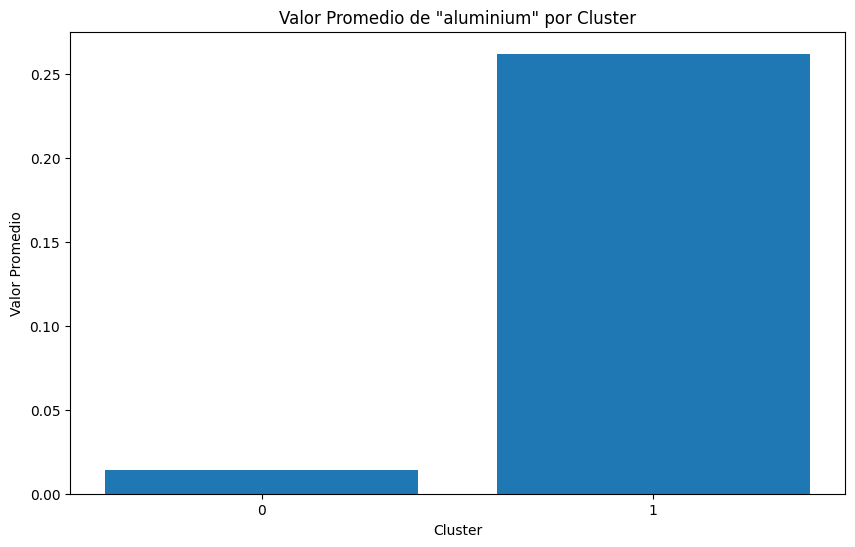

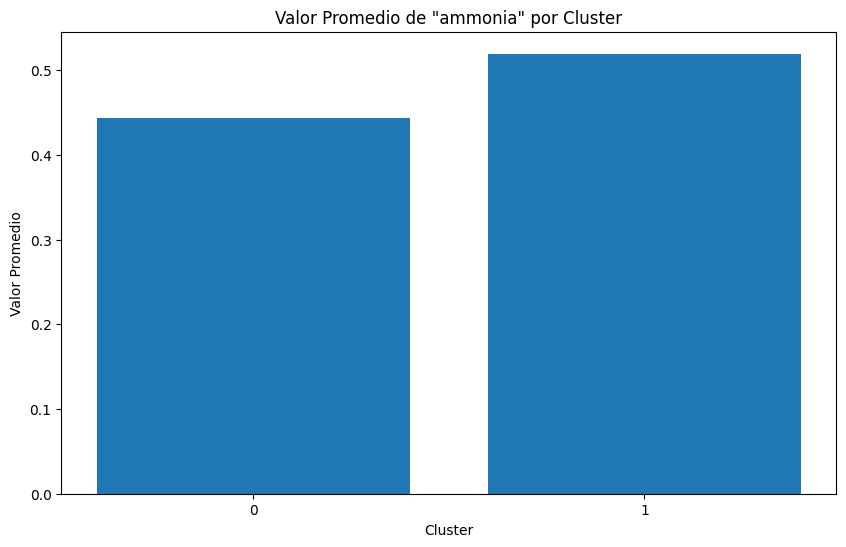

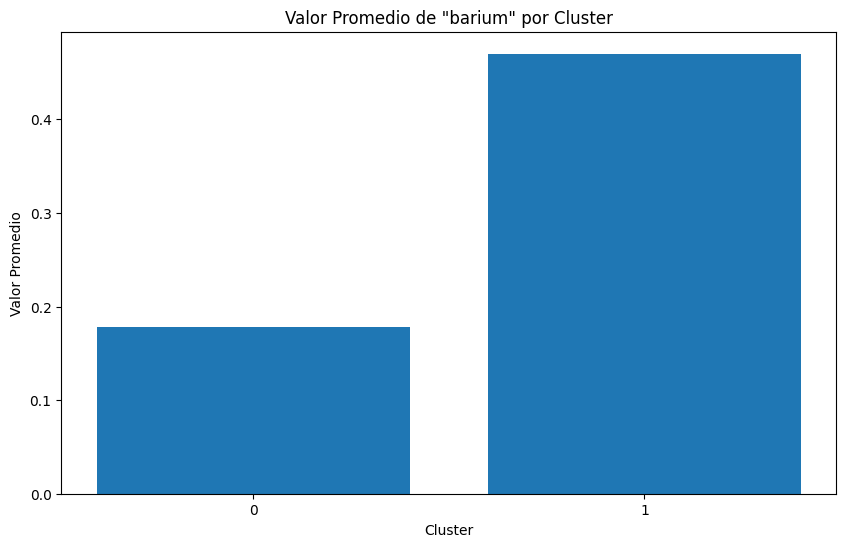

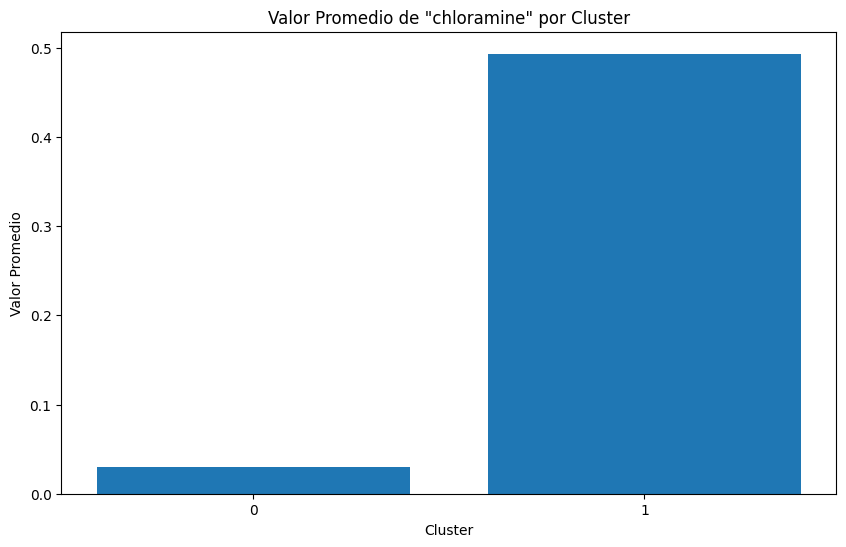

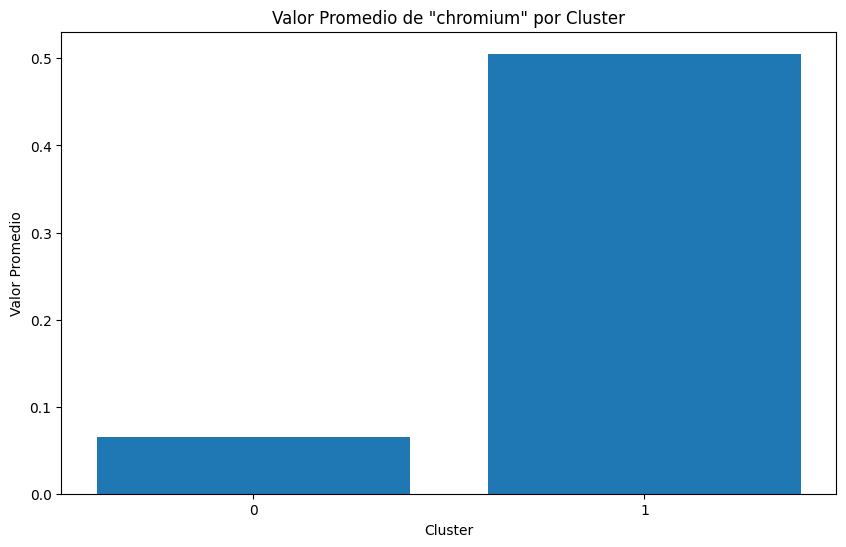

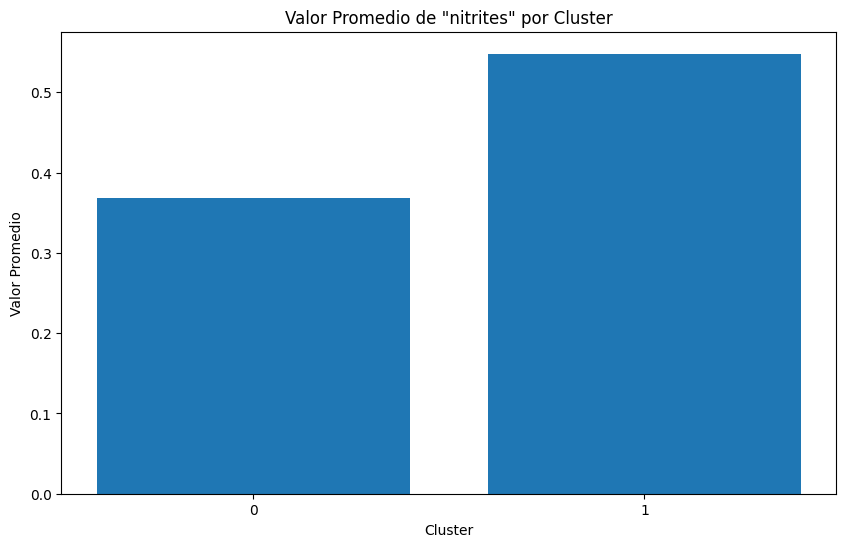

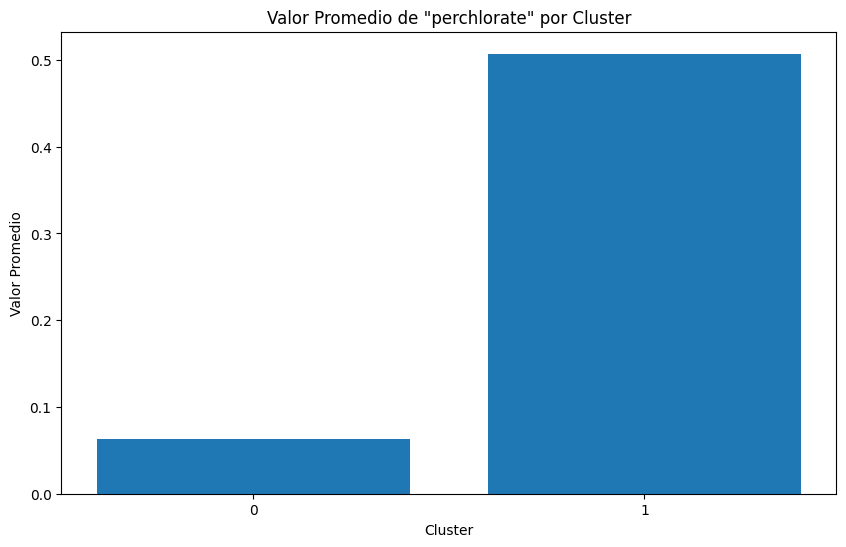

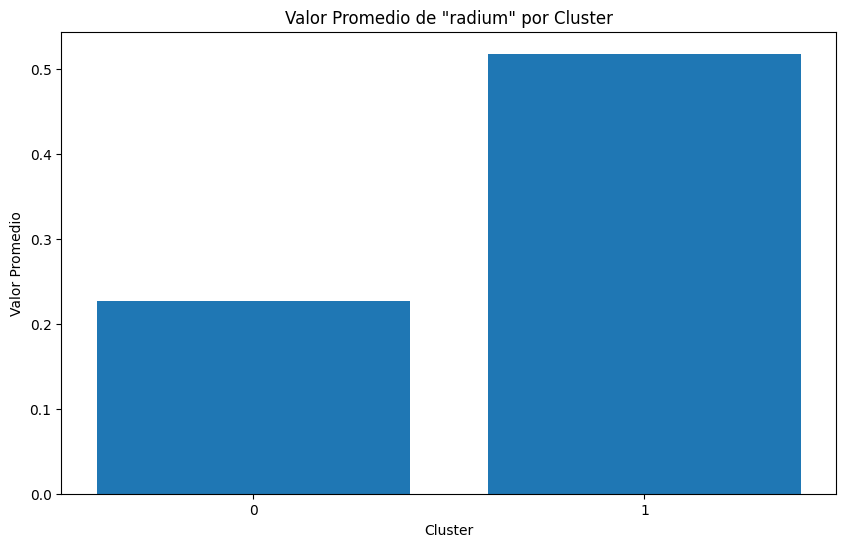

In [356]:
# si quiero ver el promedio de cada caracteristica por cluster
cluster_means = calidad_clusterizada.groupby('cluster').mean()
features = cluster_means.columns # las caracteristicas

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_means.index, cluster_means[feature])
    plt.xlabel('Cluster')
    plt.ylabel('Valor Promedio')
    plt.title(f'Valor Promedio de "{feature}" por Cluster')
    plt.xticks(cluster_means.index)  # Asegura que los ticks en el eje x representen los clusters
    plt.show()

In [357]:
# si lo quiero interactivo y en un solo grafico
import plotly.express as px
cluster_means_long = cluster_means.reset_index().melt(id_vars='cluster', var_name='Feature', value_name='Valor Promedio') # Convertir el DataFrame de valores promedio por cluster a formato largo (long format)
fig = px.bar(cluster_means_long, x='cluster', y='Valor Promedio', color='Feature', barmode='group',
             labels={'cluster': 'Cluster', 'Valor Promedio': 'Valor Promedio', 'Feature': 'Característica'},
             title='Valor Promedio de Características por Cluster')
fig.show()

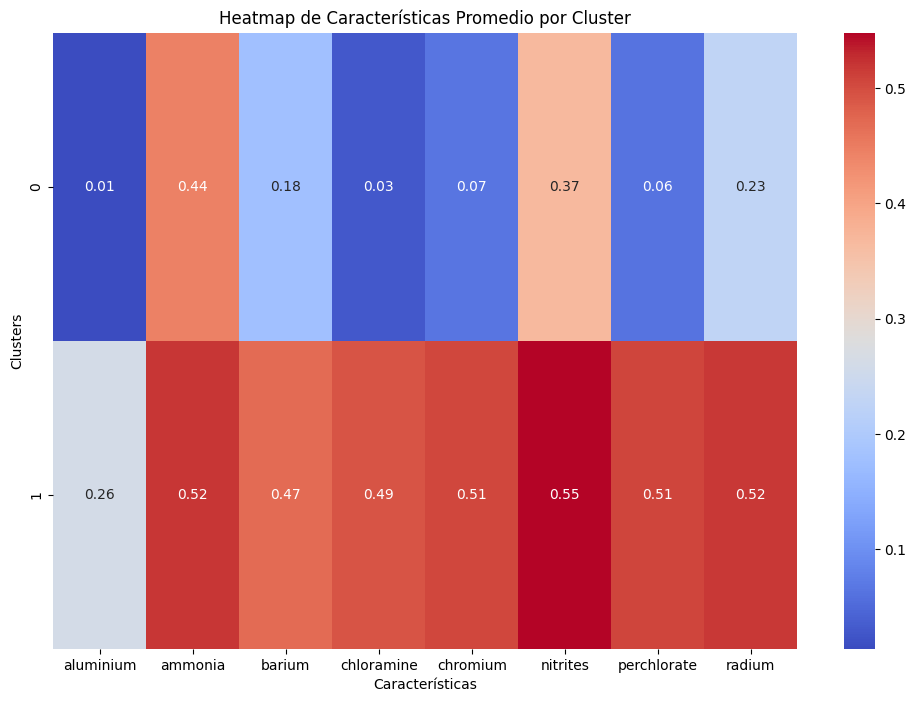

In [358]:
# Podemos representarlo con un heatmap, PARA VERLO MAS CLARO
calidad_media = calidad_clusterizada.groupby('cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(calidad_media, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de Características Promedio por Cluster')
plt.xlabel('Características')
plt.ylabel('Clusters')
plt.show()

### PRIMERAS CONCLUSIONES
 Podemos observar que los nitritos y el amoniaco están MUY relacionados con el Cluster 1, son las features que destacan aunque el cluster uno tiene un representacion muy fuerte de todos los contaminantes excepto el aluminio. Sin embargo, en el cluster 0  los nitritos tambien están en concentracion bastante alta comparado con el resto de features (a excepcion del amoniaco, que tambien es muy alto en el cluster 1)

Si queremos sacar una conclusion inicial (aunque siempre a espera de otras pruebas), podriamos estudiar qué relación
hay entre nitritos y amoniaco que las hace tan representativas en ambos clusters.
- Amoníaco (NH₃):
El amoníaco es una sustancia química que se encuentra en el agua, especialmente en acuarios y sistemas acuáticos.
Se origina a partir de desechos de peces, alimentos no consumidos y materia orgánica en descomposición.
El amoníaco es tóxico para los peces, especialmente en concentraciones más altas.
- Nitritos (NO₂-):
Los nitritos son productos intermedios en el ciclo del nitrógeno.
Se forman a partir de la oxidación del amoníaco por bacterias nitrificantes.
Los nitritos también son tóxicos para los peces, aunque en menor medida que el amoníaco.
Relación:
El amoníaco y los nitritos están relacionados porque el amoníaco se convierte en nitritos durante el proceso de nitrificación. Las bacterias nitrificantes convierten el amoníaco en nitritos y luego en nitratos (NO₃-).
En un acuario o sistema acuático, controlar los niveles de amoníaco y nitritos es esencial para mantener un ambiente saludable para los peces y otras formas de vida acuática. Mantener bajos los niveles de amoníaco y nitritos es fundamental para la salud de los organismos acuáticos

### CONCLUSION 2:
Si en uno de los clusters todas las características, excepto el aluminio, son muy representativas, mientras que en el otro solo destaca el nitrato y el amoniaco, esto sugiere diferencias significativas en la composición de los clusters y posiblemente en las condiciones o características asociadas a cada grupo de muestras. Aquí hay algunas interpretaciones posibles:

- Cluster con múltiples características significativas: El cluster donde todas las características, excepto el aluminio, son muy representativas puede ser más diverso en términos de la composición química del agua. Esto podría indicar una variedad de contaminantes o factores que están presentes en diferentes concentraciones en estas muestras.

- Cluster con un único contaminante destacado: El cluster donde solo destacan el nitrato y el amoniaco puede representar un grupo específico de muestras que están influenciadas principalmente por estos contaminantes en particular. Esto podría sugerir una fuente común de contaminación o condiciones ambientales que favorecen la presencia de nitratos y amoniaco en estas muestras.

### CONCLUSION 3
El cluster 1 tiene valores más altos para amoníaco, cloramina, cromo, nitratos, perclorato y radio en comparación con el cluster 0. Menos aluminio, el resto de valores de los contaminantes esta bastante alto
El cluster 0 tiende a tener valores más bajos en general, teniendo solo mas alto el amoniaco y los nitritos.
TENDRIAMOS QUE ANALIZAR AMBOS CLUSTER PARA SABER SI EL 1 ESTA MAS CONTAMINADO QUE EL 0, pero en principio
podriamos decir que en ambos cluster el amoniaco y los nitritos estan muy relacionados con la variabilidad del grupo.
Si en ambos clusters las mismas dos sustancias son las más significativas, hay algunas conclusiones y consideraciones que podemos extraer:
- Importancia de las Sustancias:
El hecho de que estas dos sustancias sean las más representativas en ambos clusters sugiere que podrían ser importantes para distinguir entre los grupos. Esto podría indicar que estas sustancias tienen un impacto significativo en la calidad del agua o en las características del sistema.

### PRUEBAS FUTURAS
- Enfoque en las Sustancias Clave:
Dado que estas sustancias son consistentes en ambos clusters, podríamos centrarnos en ellas durante el análisis y el monitoreo del agua.
- Realizar pruebas específicas para estas sustancias podría proporcionar información valiosa sobre la calidad del agua y posibles áreas de mejora. Con respecto a nuestras dos sustancias mas importantes (amoniaco y nitritos), pruebas especificas QUE PODRÍAMOS TENER EN CUENTA
* Para medir los niveles de nitritos y amoníaco en el agua, existen varias opciones de pruebas. 
1.  Test Kit de Nitritos NO2-N (0,0 a 1,0 mg/L): Este kit utiliza el método del ácido cromotrópico para medir los nitritos. Viene con todos los reactivos y equipos necesarios para realizar aproximadamente 100 pruebas. Precio: 52,00€ (Sin IVA)1.
2.  Checker Nitritos:Estos medidores de bolsillo digitales (HI707 y HI708) permiten realizar pruebas de nitritos. Se suministran con cubetas con tapa, reactivo para 6 tests, batería e instrucciones. Precio: 67,00€ (Sin IVA)2.
3.  Kit de Prueba para Control de Nitrificación:Incluye un colorímetro DR 900 y reactivos para amoníaco libre, monocloramina, nitrito y cloro total. Útil para la monitorización rutinaria de parámetros de calidad del agua en sistemas de agua clorada3.
- Optimización y Control: Si estas sustancias son problemáticas (por ejemplo, si están por encima de los límites permitidos), podríamos implementar medidas específicas para reducir su presencia.
- Monitorear regularmente estas sustancias nos ayudaría a controlar y optimizar la calidad del agua.
- Análisis adicional: Realizar un análisis más detallado de las muestras en cada cluster, así como investigar las condiciones ambientales y los posibles orígenes de la contaminación, puede proporcionar más información sobre las diferencias entre los clusters y sus implicaciones para la calidad y potabilidad del agua.
- Podriamos usar el indice de Rand para ver la concordancia entre las etiquetas reales (nuestra columna target) y los cluster y asi comprobar la calidad de los clusters.

### ULTIMAS CONCLUSIONES.
Sin embargo, vemos que con los cluster que hemos cogido (2), SOLO MENOS DE 2000 DE LOS 8000 PERTENECEN A UNO DE LOS CLUSTER CREADOS. Puede deberse A LA CANTIDAD DE CLUSTER SELECCIONADOS (aunque nuestros metodos silhoutte y del codo determinaban que eran los optimos) o a los outliers, PODEMOS PROBAR O AUMENTAR LOS CLUSTER por si no tenemos grupos suficientes (AUNQUE NUESTRAS PRUEBAS DETERMINAN QUE NO SERIA NECESARIO) O USAR OTRO ALGORITMO MENOS SENSIBLE A OUTLIERS, como DBSCAN, Mean Shift Clustering O Clustering aglomerativo
### AREA DE MEJORA. 
- EXPLORAR OTRO APRENDIZAJE NO SUPERVISADO PARA VER SI MÁS DE NUESTRAS MUESTRAS NOS ENTRAN EN CADA CLUSTER.
- Podriamos usar el indice de Rand para ver la concordancia entre las etiquetas reales (nuestra columna target) y los cluster y asi comprobar la calidad de los clusters.

AHORA, VAMOS A CREAR CLUSTERS DIRECTAMENTE CON EL DATASET DE POTABILIDAD, no haremos PCA ANTES PORQUE TIENE POCAS FEATURES. PERO DE NUEVO, ¿CUÁNTOS CLUSTER HAGO QUE PUEDAN SER SIGNIFICATIVOS? Puedo usar el metodo del codo como en PCA, O SILHOUTTE, COMO ANTES PROBARE AMBOS, A VER CUAL NOS DA MEJOR RESULTADOS

In [359]:
# LO PRIMERO, DEBO NORMALIZAR. ES UNA BUENA PRACTICA CON KMEANS, PARA QUE TODOS MIS DATOS ESTEN EN LA MISMA ESCALA.
# VOY A USAR MINMAX SCALER, PORQUE DESEO mantener la forma original de la distribución y
# Y no estoy segura de la distribución de tus datos, y asi manejo tambien mejor los outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
potabilidad_normalizada = scaler.fit_transform(potabilidad_sin_target)
potabilidad_sin_target = pd.DataFrame(potabilidad_normalizada, columns=potabilidad_sin_target.columns)

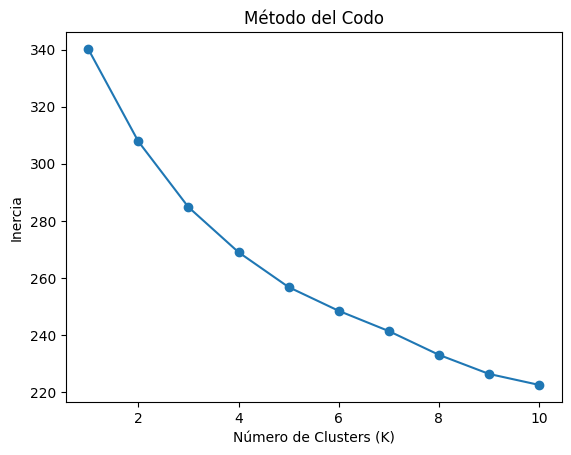

In [360]:
from sklearn.cluster import KMeans
inercia = [] # CREAMOS UNA LISTA VACIA, DONDE IREMOS INTRODUCIENDO LOS VALORES DE INERCIA
for k in range(1, 11):  # Probamos desde 1 hasta 12 clusters
    kmeans = KMeans(n_clusters=k,n_init ='auto')
    kmeans.fit(potabilidad_sin_target)
    inercia.append(kmeans.inertia_)

# Y VISULIZAMOS
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
# siguiendo este metodo, no hemos encontrado un codo muy claro, aunque vemos que se dobla a partir del 4 cluster.

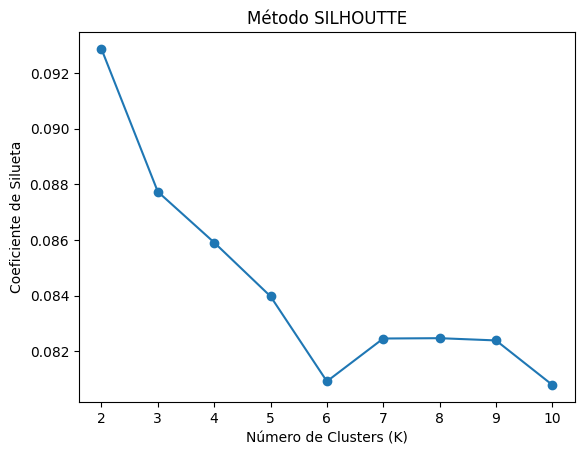

In [361]:
coeficientes_silueta = [] # CREAMOS LISTA VACIA PARA LOS DISTINTOS COEFICIENTES DE SILUETA
for k in range(2, 11):  # Probamos desde 2 hasta 10 clusters
    kmeans = KMeans(n_clusters=k,n_init ='auto')
    etiquetas = kmeans.fit_predict(potabilidad_sin_target)
    coeficiente_silueta = silhouette_score(potabilidad_sin_target, etiquetas)
    coeficientes_silueta.append(coeficiente_silueta)

# Y DIBUJAMOS
plt.plot(range(2, 11), coeficientes_silueta, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método SILHOUTTE')
plt.show()

In [362]:
# Segun silhoutte, hay una pequeña subida en el cluster, lo que indica que puede ser una buena idea elegir 6.
# de todas formas, COMO PODEMOS CAMBIAR LOS CLUSTER SI ES NECESARIO, COGEREMOS 6 EN UN PRIMER MOMENTO
kmeans = KMeans(n_clusters=6,n_init='auto')  # incluimos los 6 clusters que hemos hablado
clusters = kmeans.fit_predict(potabilidad_sin_target)

Cluster 0:
               ph    Hardness      Solids  Chloramines     Sulfate  \
count  369.000000  369.000000  369.000000   369.000000  369.000000   
mean     0.524340    0.528805    0.330739     0.522209    0.582081   
std      0.104537    0.115141    0.111298     0.128978    0.105655   
min      0.229486    0.103670    0.000000     0.118851    0.242765   
25%      0.453104    0.456662    0.254203     0.441905    0.522155   
50%      0.518796    0.521417    0.331489     0.519732    0.576149   
75%      0.583950    0.597308    0.414295     0.608683    0.639970   
max      0.952796    0.956076    0.575034     0.957388    0.984964   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  cluster  
count    369.000000      369.000000       369.000000  369.000000    369.0  
mean       0.371362        0.520701         0.492457    0.311380      0.0  
std        0.109406        0.132698         0.134683    0.090987      0.0  
min        0.100391        0.153200         0.000000  

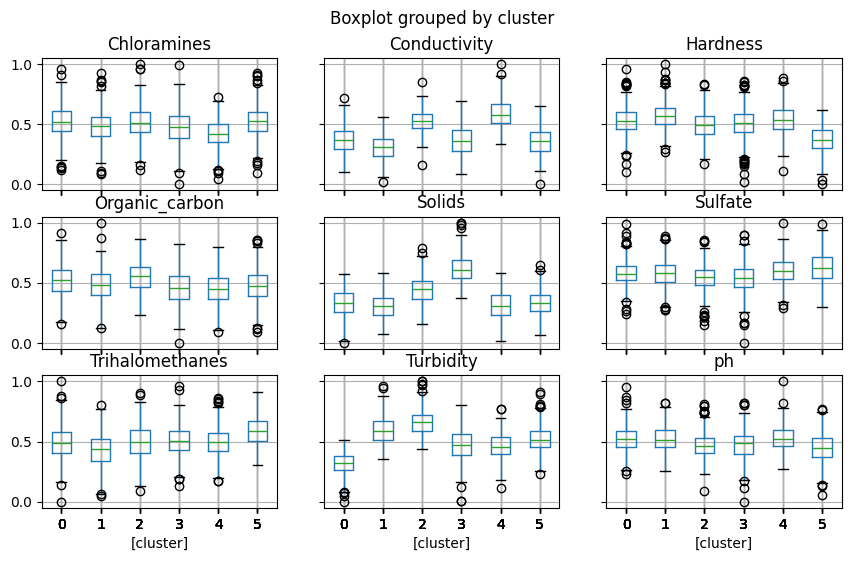

In [363]:
# AHORA, VAMOS A ANALIZAR LOS CLUSTERS QUE HEMOS CREADO PARA EL DATASET DE POTABILIDAD, A VER SI ENCONTRAMOS RELACIONES SIGNIFICATIVAS.
# PARA PODER HACERLO, CREARE UNA COLUMNA EN MI DATASET, DE POTABILIDAD Y AÑADIRE LAS ETIQUETAS de los cluster
potabilidad_clusterizada = potabilidad_sin_target.copy()  # hago una copia
potabilidad_clusterizada['cluster'] = clusters # asi, tenemos las etiquetas de los cluster en cada columna

grouped_data = potabilidad_clusterizada.groupby('cluster') # es necesario agrupar, SI NO, NO VERIAMOS LOS GRUPOS

for cluster, group in grouped_data: # PARA VER LAS CARACTERISTICAS
    print(f"Cluster {cluster}:")
    print(group.describe())
    print("\n")

#  SI QUIERO VERLO EN GRAFICOS, un boxplot de cada característica por cluster:
potabilidad_clusterizada.boxplot(by='cluster', figsize=(10, 6))
plt.show()

In [371]:
# Y DE NUEVO, si quiero ver que datos estan dentro UN CLUSTER.
labels = pd.Series(kmeans.labels_, index=potabilidad_sin_target.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data1 = pd.concat([potabilidad_sin_target, labels], axis=1)
cluster_4_data = clustered_data1[clustered_data1['cluster'] == 4] # Filtramos los datos en el cluster 4
cluster_4_data # Y ANALIZAMOS CADA CLUSTER, importante SI QUEREMOS USAR LAS ETIQUETAS DEL ANTIGUO TARGET ELIMINADO, PODEMOS INCLUIRLAS AHORA

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,cluster
4,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,4
9,0.650141,0.821509,0.422313,0.469841,0.765134,0.500894,0.450980,0.544782,0.605315,4
10,0.518682,0.578252,0.450604,0.259182,0.587319,0.486285,0.415580,0.469753,0.220090,4
18,0.354933,0.485801,0.343607,0.397903,0.553464,0.435234,0.353392,0.352280,0.486068,4
27,0.550527,0.110584,0.208173,0.325614,0.335769,0.731527,0.298764,0.498230,0.197719,4
...,...,...,...,...,...,...,...,...,...,...
1976,0.408954,0.879585,0.059105,0.228504,0.746234,0.444974,0.167825,0.351561,0.391820,4
1978,0.541085,0.519101,0.564023,0.531935,0.459450,0.692356,0.590345,0.266758,0.366227,4
1988,0.412637,0.687518,0.452233,0.291057,0.729730,0.473051,0.488449,0.450632,0.506964,4
1990,0.407232,0.834845,0.309618,0.176150,0.770295,0.462394,0.618877,0.550002,0.453737,4


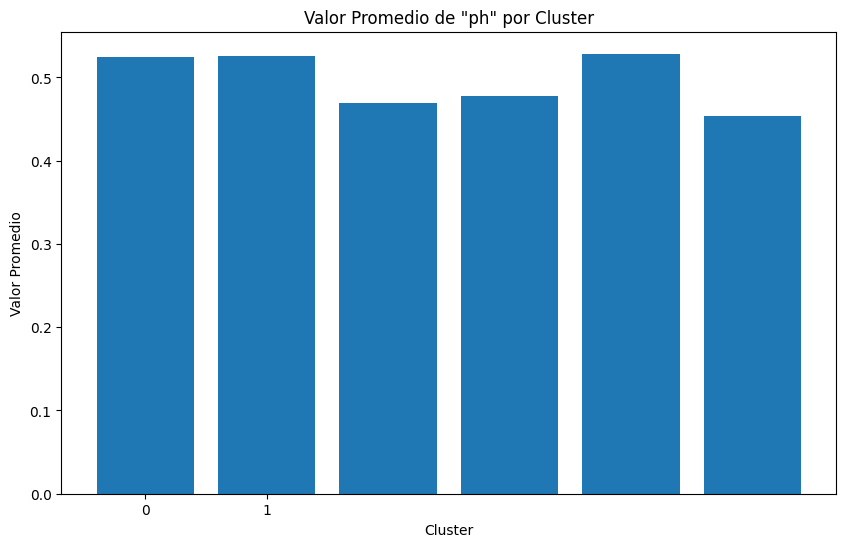

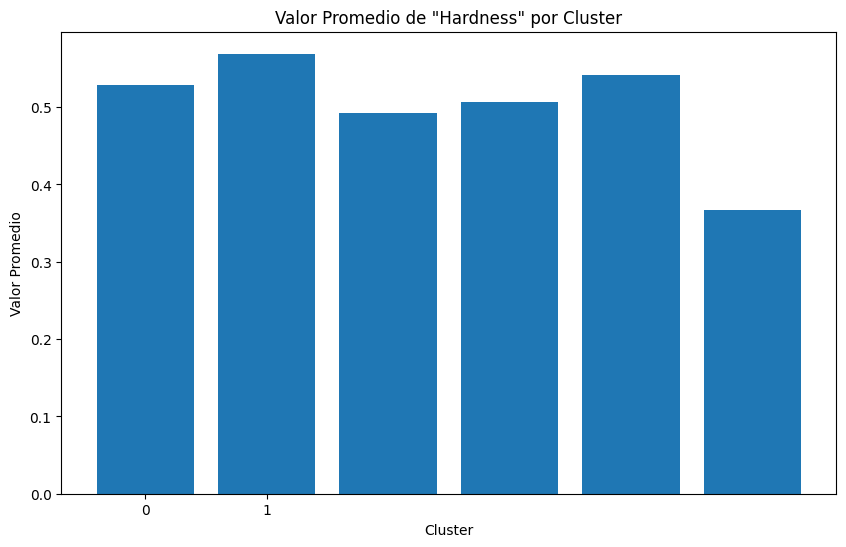

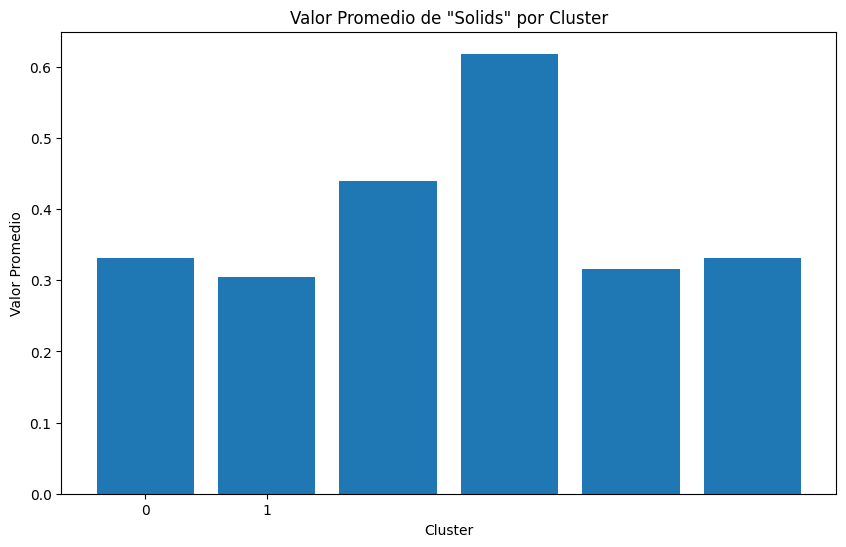

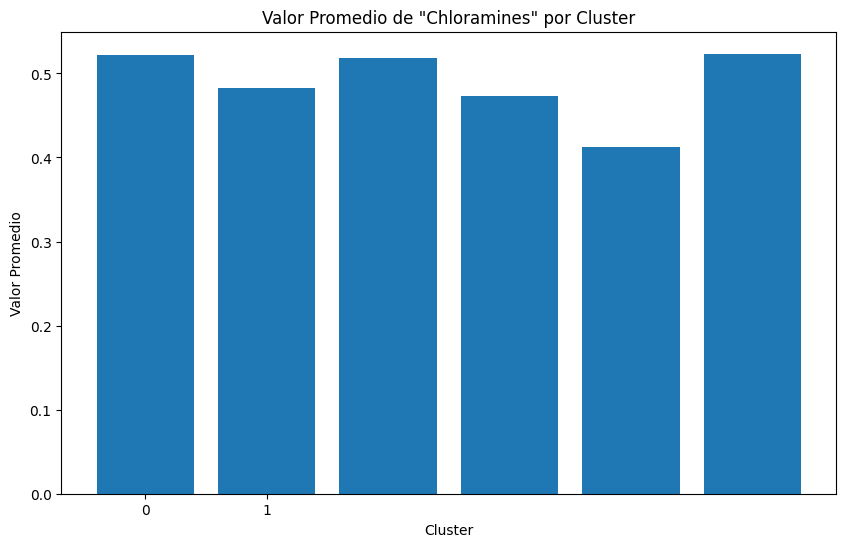

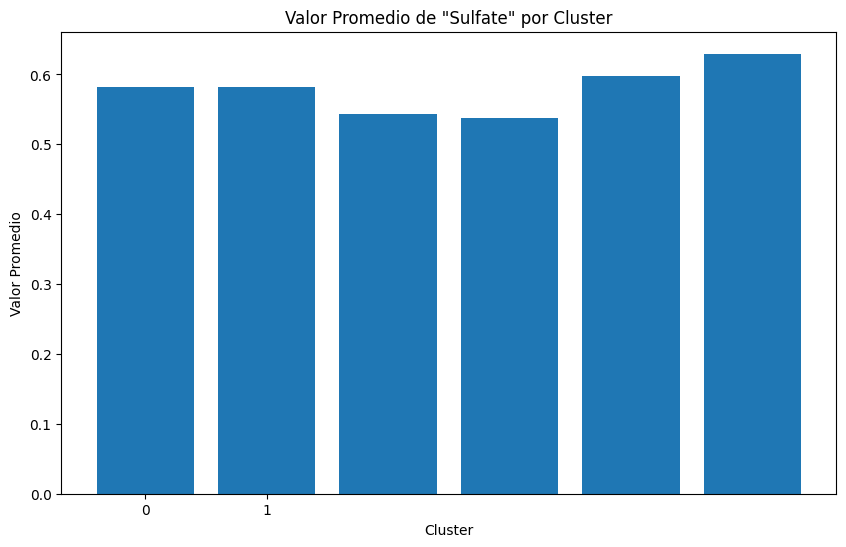

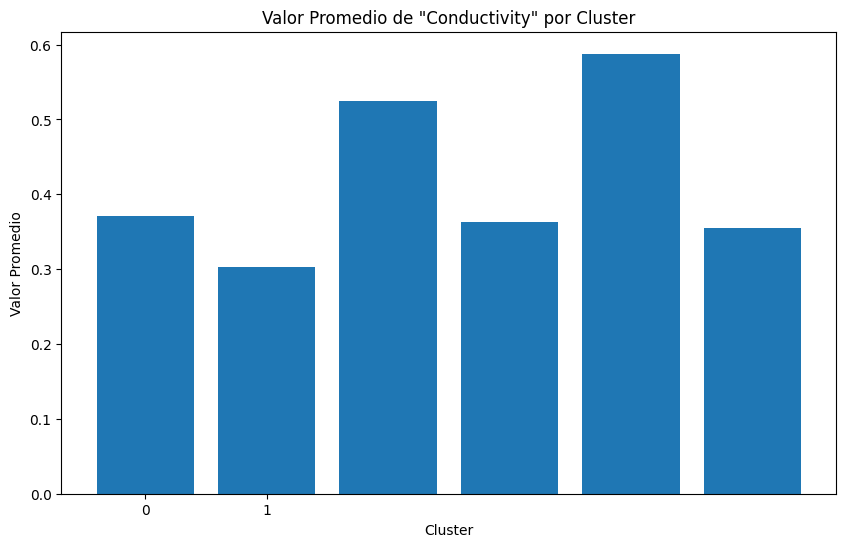

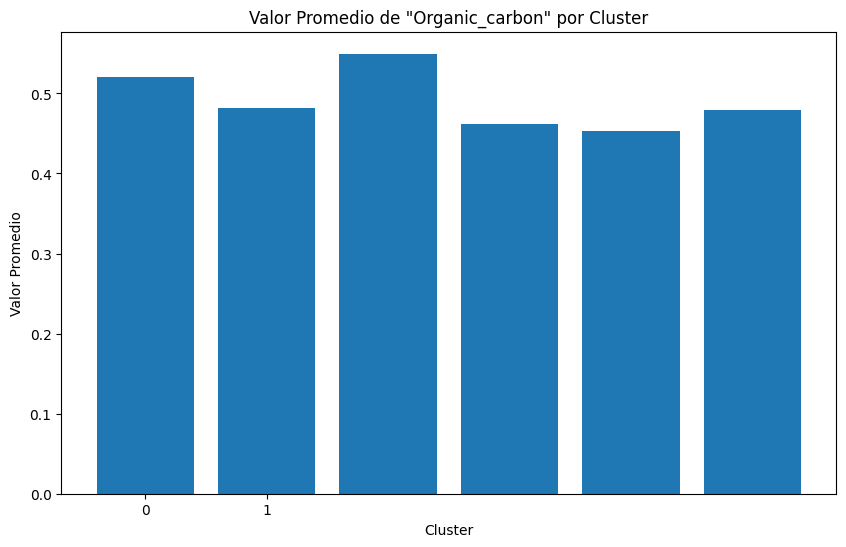

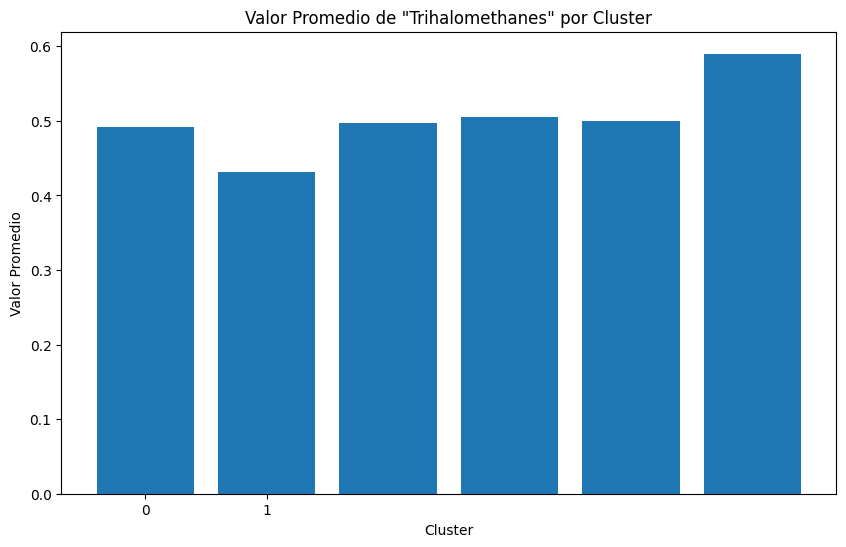

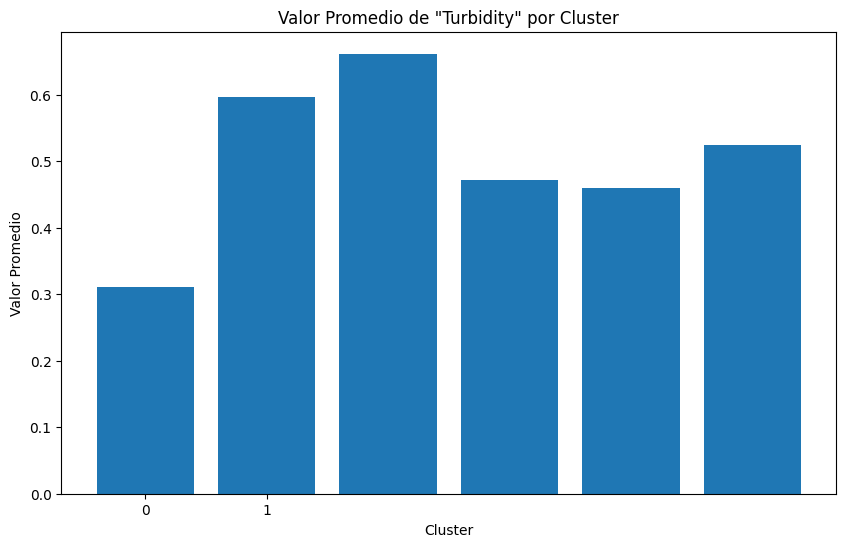

In [372]:
# Para representar la diferencia en la media en cada cluster de cada componente
cluster_means2 = potabilidad_media.groupby('cluster').mean()
features = cluster_means2.columns # las caracteristicas
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_means2.index, cluster_means2[feature])
    plt.xlabel('Cluster')
    plt.ylabel('Valor Promedio')
    plt.title(f'Valor Promedio de "{feature}" por Cluster')
    plt.xticks(cluster_means.index)  # Asegura que los ticks en el eje x representen los clusters
    plt.show()

In [373]:
# y en un solo grafico
cluster_means_long = cluster_means2.reset_index().melt(id_vars='cluster', var_name='Feature', value_name='Valor Promedio') # Convertir el DataFrame de valores promedio por cluster a formato largo (long format)
fig = px.bar(cluster_means_long, x='cluster', y='Valor Promedio', color='Feature', barmode='group',
             labels={'cluster': 'Cluster', 'Valor Promedio': 'Valor Promedio', 'Feature': 'Característica'},
             title='Valor Promedio de Características por Cluster')
fig.show()

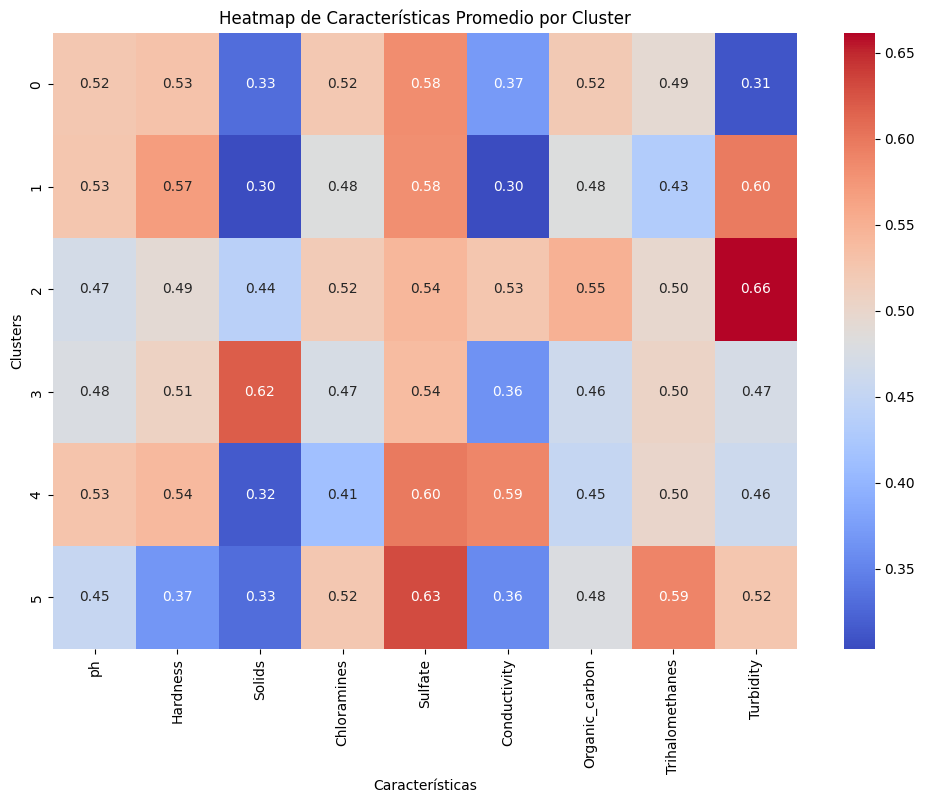

In [374]:
# Podemos representarlo con un heatmap, PARA VERLO MAS CLARO
potabilidad_media = potabilidad_clusterizada.groupby('cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(potabilidad_media, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de Características Promedio por Cluster')
plt.xlabel('Características')
plt.ylabel('Clusters')
plt.show()

### PRIMERAS CONCLUSIONES
CONCLUSIONES:
- Turbidez (Turbidity): El cluster 2 tiene la mayor turbidez (0.66), lo que sugiere que las muestras en este grupo pueden tener agua más turbia o con partículas en suspensión.
- Sulfato (Sulfate): El cluster 5 muestra una concentración notablemente alta de sulfato (0.63), aunque tambien es bastante representativo en el 4, el 1 y el 0. Esto podría estar relacionado con la calidad del agua subterránea.
- Solids(solidos):El cluster 3 muestra una concentración notablemente alta de solidos (0.63). La característica “Sólidos” generalmente se refiere a la cantidad de partículas disueltas o suspendidas en el agua.
Un valor alto de sólidos podría indicar una mayor concentración de minerales, sedimentos o contaminantes en el agua.
- Balance General: En general, los valores están equilibrados en todos los clusters y características, sin valores atípicos extremos, excepto los mencionados anteriormente.

## Estudio mas exhaustivo
- Cluster 0:
Tiene un valor alto en Sulfate (sulfato), pero no muestra una característica dominante adicional.
- Cluster 1:
Muestra valores moderados en todas las características, excepto solidos y conductividad, que son relativamente bajos. No hay una característica dominante en este cluster, aunque la turbidez es bastante representativa.
- Cluster 2:
Se caracteriza por tener el valor más alto en Turbidity (turbidez).
La turbidez podría estar relacionada con partículas en suspensión en el agua.
- Cluster 3:
Destaca por tener un alto valor en Solids (sólidos), lo que sugiere una mayor concentración de partículas disueltas en el agua.
- Cluster 4:
Este cluster tiene valores altos en pH, Hardness (dureza), sulfatos y Conductivity (conductividad).
Podría estar relacionado con agua de mayor alcalinidad y dureza, posiblemente debido a minerales disueltos. Puede indicar agua más ácida
- Cluster 5:
Valores altos especialmente en sulfatos y trihalometanos

AUN A ESPERA DE MÁS ESTUDIO, EL UNICO ELEMENTO QUE SE MANTIENE RELATIVAMENTE ALTO EN TODOS LOS CLUSTERS SON LOS SULFATOS.
Puede ser debido a varios motivos:
- Ubicuidad de los Sulfatos: Los sulfatos pueden estar presentes en el agua de forma generalizada debido a factores geológicos, fuentes naturales o actividades humanas extendidas en la región. En este caso, su alta presencia en todos los clusters reflejaría la distribución general de este componente en el área estudiada.
- Características del Agua: La alta presencia de sulfatos en todos los clusters puede indicar que este componente es una característica distintiva del agua en esa área en particular, de la que se han obtenido las muestras. Puede estar influenciada por factores específicos de la región.
- Contaminación Generalizada: En algunos casos, la presencia generalizada de sulfatos puede ser indicativa de la contaminación generalizada del agua en el área de estudio. Esto podría ser el resultado de actividades industriales, agrícolas o mineras que liberan sulfatos al medio ambiente.
Sin más pruebas, no podríamos sacar ninguna conclusion más sobre este particular.

### MEDIDAS
Basándonos en el mapa de calor y los diferentes clusters, podemos extraer algunas conclusiones y considerar medidas específicas para mejorar la calidad del agua en cada cluster:
- **Cluster 0**:
Alto sulfato: Monitorear el sulfato y considerar medidas para mantenerlo dentro de los límites aceptables.
- **Cluster 1**:
Valores moderados en todas las características: Aunque no hay una característica dominante, podríamos seguir monitoreando regularmente el agua para detectar cualquier cambio significativo.
- **Cluster 2**:
Alta turbidez: La turbidez puede afectar la claridad del agua. Filtrar o tratar el agua para reducir la turbidez podría ser beneficioso.
- **Cluster 3**:
Alta concentración de sólidos: Implementar sistemas de filtración o tratamiento para reducir los sólidos disueltos en el agua.
- **Cluster 4**:
Alta dureza,ph y conductividad: Podríamos considerar medidas para reducir la dureza del agua, como el uso de ablandadores de agua. Además, podríamos monitorear la conductividad para asegurarnos de que esté dentro de los límites seguros.
- **Cluster 5**:
Alto sulfato: Monitorear el sulfato y considerar medidas para mantenerlo dentro de los límites aceptables.


### ULTIMAS CONCLUSIONES
Al usar técnicas de Machine Learning no supervisado, hay que tener en cuenta que cada cluster tiene sus propias características, y no siempre es sencilla su interpretación ni ver las relaciones entre distintas features tras la agrupacion. Puede haber relaciones que no hayamos sido capaces de ver, asi como algunas que aunque nos parezcan claras, no son fáciles de definir o de demostrar. Con respecto a las medidas preventivas, dependerán de la situación local, la fuente de agua y los objetivos de calidad.
Sería necesario obtener más informacion de estos dataset como, por ejemplo, de donde se tomaron las muestras, LA FUENTE DE AGUA Y LA UBICACION, para poder tener respuestas más claras al por qué de la formación de algunos clusters. 
A veces, el conocimiento del contexto puede ayudarte a comprender mejor la agrupación.


- A LA PREGUNTA
¿Qué decisiones o acciones te permiten llevar a cabo tu modelo?
1.	Identificación de áreas de riesgo: podríamos utilizarlo para identificar áreas geográficas con mayores niveles de contaminación o riesgo para la salud pública.
2.	Priorización de recursos: Basándonos en las predicciones de mi modelo, podríamos priorizar la asignación de recursos y medidas de control para abordar los problemas identificados en cada cluster.
3.	Planificación a largo plazo: El análisis de tendencias y patrones proporcionado por mi modelo puede ayudar en la planificación a largo plazo para mejorar la calidad del agua y garantizar su potabilidad.
